# 与信問題
## エラーもそのままにしています

In [2]:
import numpy as np #行列
import pandas as pd #データ分析
import matplotlib.pyplot as plt
import seaborn as sns #matplotlibを使いやすくしたもの
%matplotlib inline

import pandas_profiling as pdp #pandas report

# pdp.ProfileReport(df)  #分析してくれる

import cv2

In [3]:
df=pd.read_csv('application_train.csv')

In [4]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

Home Creditはどのような企業？　: チェコにある金融会社（お金を貸す会社）  
 
このコンペティションでは何を予測する？: 貸してよいか（滞納などのリスクがないか）  
 
それを予測することで企業が得られるメリットは何？:  精度を上げれば利益が上がる　　

# 【問題2】データの概観の把握

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [7]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [8]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# List files available
print(os.listdir("./input/"))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [10]:
# Training data
app_train = pd.read_csv('./input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [11]:
# Testing data features
app_test = pd.read_csv('./input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [12]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

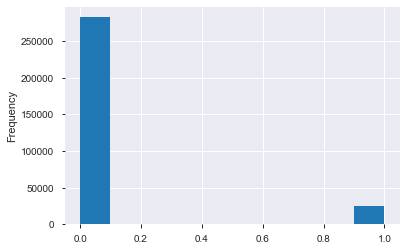

In [13]:
app_train['TARGET'].astype(int).plot.hist()

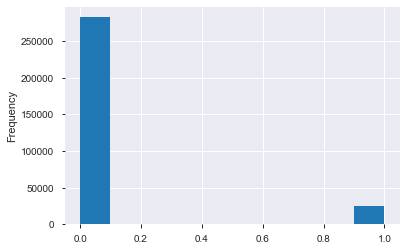

In [14]:
app_train['TARGET'].astype(int).plot.hist();

In [15]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

In [17]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [18]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [19]:
app_train.select_dtypes('object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
5              Cash loans           M            N               Y   
6              Cash loans           F            Y               Y   
7              Cash loans           M            Y               Y   
8              Cash loans           F            N               Y   
9         Revolving loans           M            N               Y   
10             Cash loans           F            N               Y   
11             Cash loans           F            N               Y   
12             Cash loans           F            N               Y   
13             Cash loans           M            Y               N   
14             Cash loans           F            N               Y   
15             Cash loans           M            Y               Y   
16             Cash loans           M            N               N   
17        Revolving loans           F            N               Y   
18        Revolving loans           F            N               Y   
19             Cash loans           F            N               Y   
20        Revolving loans           M            Y               Y   
21             Cash loans           F            Y               Y   
22             Cash loans           F            N               N   
23             Cash loans           F            N               Y   
24             Cash loans           M            Y               N   
25             Cash loans           F            N               Y   
26             Cash loans           F            N               Y   
27             Cash loans           M            N               Y   
28             Cash loans           M            Y               Y   
29        Revolving loans           M            N               Y   
...                   ...         ...          ...             ...   
307481         Cash loans           M            N               Y   
307482         Cash loans           F            Y               Y   
307483         Cash loans           F            N               Y   
307484         Cash loans           F            Y               N   
307485    Revolving loans           F            N               Y   
307486         Cash loans           F            Y               Y   
307487         Cash loans           M            N               Y   
307488         Cash loans           F            N               N   
307489         Cash loans           F            N               Y   
307490         Cash loans           M            N               Y   
307491         Cash loans           M            Y               Y   
307492         Cash loans           M            Y               Y   
307493         Cash loans           F            N               Y   
307494         Cash loans           M            Y               N   
307495         Cash loans           M            Y               N   
307496    Revolving loans           F            N               N   
307497         Cash loans           F            Y               Y   
307498         Cash loans           M            Y               Y   
307499         Cash loans           F            N               Y   
307500         Cash loans           F            N               Y   
307501         Cash loans           F            N               Y   
307502         Cash loans           F            N               Y   
307503         Cash loans           F            N               Y   
307504         Cash loans           F            N               Y   
307505         Cash loans           F            N               Y   
307506         Ca

In [20]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [21]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [22]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [23]:
app_train['DAYS_BIRTH'] 

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
5        -16941
6        -13778
7        -18850
8        -20099
9        -14469
10       -10197
11       -20417
12       -13439
13       -14086
14       -14583
15        -8728
16       -12931
17        -9776
18       -17718
19       -11348
20       -18252
21       -14815
22       -11146
23       -24827
24       -11286
25       -19334
26       -18724
27       -15948
28        -9994
29       -10341
          ...  
307481   -20644
307482   -14106
307483   -24911
307484   -12847
307485   -11973
307486   -16010
307487   -23125
307488   -10092
307489   -16471
307490    -9874
307491   -10976
307492   -20965
307493   -17533
307494   -14958
307495   -20922
307496   -17345
307497   -16679
307498   -19102
307499   -16988
307500   -20390
307501   -12961
307502   -16063
307503   -11870
307504   -16705
307505   -24384
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length

In [24]:
app_train['DAYS_BIRTH'] / -365


0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
5         46.413699
6         37.747945
7         51.643836
8         55.065753
9         39.641096
10        27.936986
11        55.936986
12        36.819178
13        38.591781
14        39.953425
15        23.912329
16        35.427397
17        26.783562
18        48.542466
19        31.090411
20        50.005479
21        40.589041
22        30.536986
23        68.019178
24        30.920548
25        52.969863
26        51.298630
27        43.693151
28        27.380822
29        28.331507
            ...    
307481    56.558904
307482    38.646575
307483    68.249315
307484    35.197260
307485    32.802740
307486    43.863014
307487    63.356164
307488    27.649315
307489    45.126027
307490    27.052055
307491    30.071233
307492    57.438356
307493    48.035616
307494    40.980822
307495    57.320548
307496    47.520548
307497    45.695890
307498    52.334247
307499    46.542466


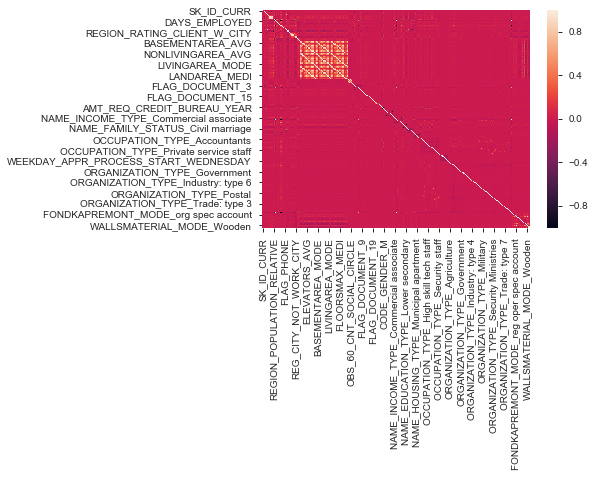

In [25]:
sns.heatmap(app_train.corr())

In [26]:
#sns.pairplot(app_train)

In [27]:
sns.(app_train.iloc[:10, :10])

SyntaxError: invalid syntax (<ipython-input-27-776354b502b2>, line 1)

In [28]:
app_train['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
5         27517.5
6         41301.0
7         42075.0
8         33826.5
9         20250.0
10        21177.0
11        10678.5
12         5881.5
13        28966.5
14        32778.0
15        20160.0
16        26149.5
17        13500.0
18         7875.0
19        17563.5
20        21375.0
21        37561.5
22        32521.5
23        23850.0
24        12703.5
25        11074.5
26        27076.5
27        23827.5
28        57676.5
29         9000.0
           ...   
307481    19975.5
307482    34969.5
307483    16479.0
307484    35617.5
307485     9000.0
307486    18283.5
307487    31473.0
307488    13351.5
307489    23089.5
307490     9148.5
307491    31522.5
307492    43443.0
307493    37678.5
307494    46858.5
307495    23773.5
307496    16875.0
307497    12028.5
307498    52168.5
307499    12694.5
307500    35982.0
307501    11871.0
307502    10620.0
307503    17770.5
307504    16096.5
307505    

In [29]:
#sns.pairplot(df2, hue="Species")

## 考察
　
Target=1(滞納など）の人は全体の1割程度
欠損値が半分くらいを占める変数も結構ある（下記で調べた）
コメントだけでは変数の意味がわからないこともある（例： EXT_SOURCE_1など）

# 【問題3】課題設定

仮説  
・ お金を持っている方が貸倒れ率が低い
・ 色々なものを所有している（車など）方が貸倒れ率が低い
　
疑問
・ Taget = 0 （1でないひと）は、返してくれた人なのか、まだ返してくれてないが返済期限が来ていない人も含まれているのか

# 【問題4】データ探索

In [31]:
app_train_1 = app_train.iloc[:10, :10]

In [42]:
app_train_2 = app_train.loc[:, ['TARGET',  'AMT_CREDIT'] ]

In [43]:
app_train_2.head()

TARGET  AMT_CREDIT
0       1    406597.5
1       0   1293502.5
2       0    135000.0
3       0    312682.5
4       0    513000.0

In [45]:
app_train_2.head()

TARGET  AMT_CREDIT
0       1    406597.5
1       0   1293502.5
2       0    135000.0
3       0    312682.5
4       0    513000.0

In [73]:
#sns.pairplot(app_train_2, hue="TARGET")

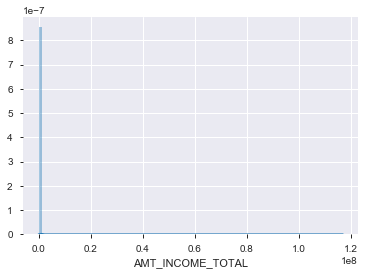

In [48]:
sns.distplot(app_train[ 'AMT_INCOME_TOTAL'] , bins=100)

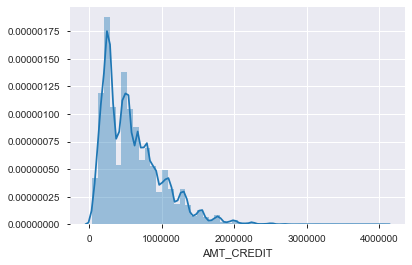

In [41]:
sns.distplot(app_train[ 'AMT_CREDIT'] )

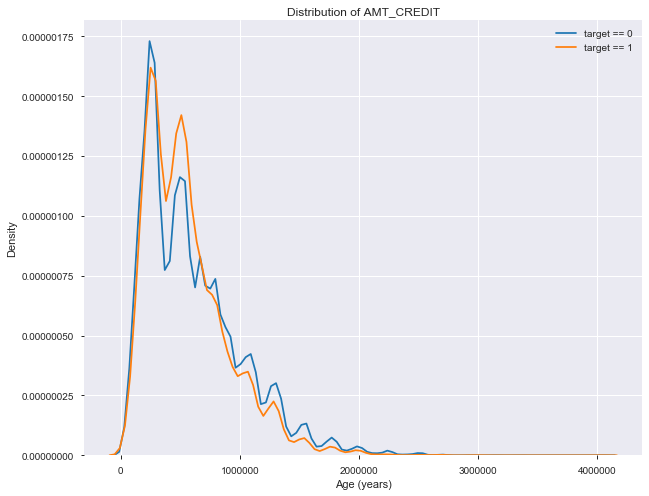

In [52]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_CREDIT'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of AMT_CREDIT');

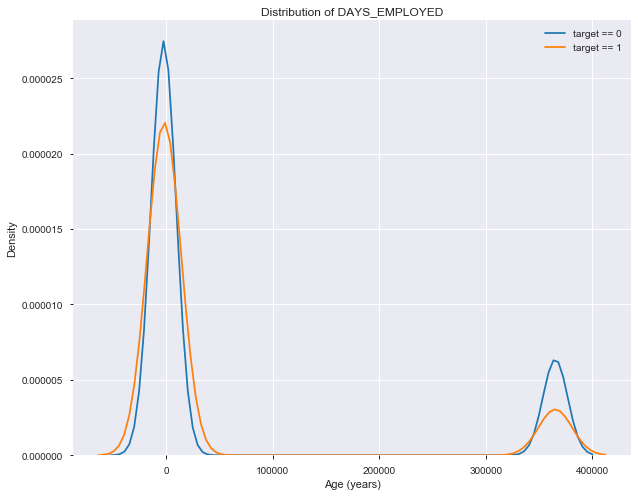

In [54]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of DAYS_EMPLOYED');

In [55]:
df_number = df.select_dtypes(include='number')

In [56]:
df.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   
TARGET                        -0.002108  1.000000      0.019187   
CNT_CHILDREN                  -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              -0.001820 -0.003982      0.012882   
AMT_CREDIT                    -0.000343 -0.030369      0.002145   
AMT_ANNUITY                   -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE               -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE     0.000849 -0.037227     -0.025573   
DAYS_BIRTH                    -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION             -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH               -0.000384  0.051457     -0.028019   
OWN_CAR_AGE                    0.001818  0.037612      0.008494   
FLAG_MOBIL                     0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE               -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE               0.002815  0.000370     -0.000794   
FLAG_PHONE                     0.002753 -0.023806     -0.029906   
FLAG_EMAIL                     0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS               -0.002895  0.009308      0.879161   
REGION_RATING_CLIENT          -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY   -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START        0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION    -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION     0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION    0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY        -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY        -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY        0.000067  0.032518      0.069957   
EXT_SOURCE_1                   0.000082 -0.155317     -0.138470   
...                                 ...       ...           ...   
DEF_30_CNT_SOCIAL_CIRCLE      -0.000082  0.032248     -0.001262   
OBS_60_CNT_SOCIAL_CIRCLE      -0.001423  0.009022      0.015232   
DEF_60_CNT_SOCIAL_CIRCLE       0.001187  0.031276     -0.001861   
DAYS_LAST_PHONE_CHANGE        -0.000858  0.055218     -0.005865   
FLAG_DOCUMENT_2                0.000700  0.005417      0.001786   
FLAG_DOCUMENT_3               -0.003411  0.044346      0.056837   
FLAG_DOCUMENT_4               -0.004139 -0.002672     -0.003709   
FLAG_DOCUMENT_5               -0.001097 -0.000316     -0.016737   
FLAG_DOCUMENT_6                0.002121 -0.028602     -0.157024   
FLAG_DOCUMENT_7               -0.002694 -0.001520     -0.001498   
FLAG_DOCUMENT_8                0.001809 -0.008040      0.051697   
FLAG_DOCUMENT_9                0.001505 -0.004352     -0.001997   
FLAG_DOCUMENT_10              -0.000815 -0.001414     -0.002756   
FLAG_DOCUMENT_11              -0.002012 -0.004229     -0.005318   
FLAG_DOCUMENT_12              -0.001045 -0.000756      0.000293   
FLAG_DOCUMENT_13               0.000896 -0.011583      0.003945   
FLAG_DOCUMENT_14              -0.001077 -0.009464     -0.005459   
FLAG_DOCUMENT_15               0.002604 -0.006536      0.003609   
FLAG_DOCUMENT_16              -0.000724 -0.011615      0.010662   
FLAG_DOCUMENT_17               0.001450 -0.003378      0.000773   
FLAG_DOCUMENT_18               0.000509 -0.007952      0.004031   
FLAG_DOCUMENT_19               0.000167 -0.001358      0.000864   
FLAG_DOCUMENT_20               0.001073  0.000215      0.000988   
FLAG_DOCUMENT_21               0.000282  0.003709     -0.002450   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.002672  0.000930     -0.000410   
AMT_REQ_CREDIT_BUREAU_DAY     -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK     0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON      0.000485 -0.012462     -0.010808   
AMT_REQ_C

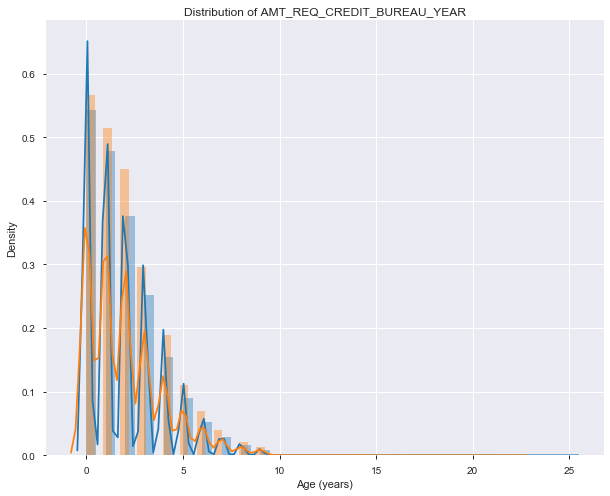

In [144]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.distplot(app_train.loc[app_train['TARGET'] == 0, name].dropna() , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.distplot(app_train.loc[app_train['TARGET'] == 1, name].dropna() , label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of {}'.format(name));

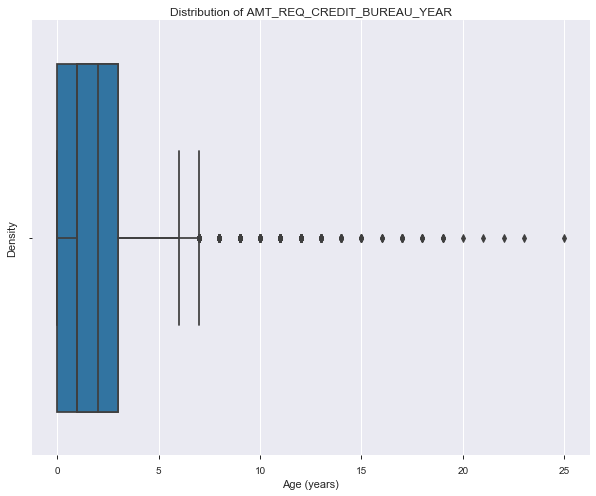

In [147]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.boxplot(app_train.loc[app_train['TARGET'] == 0, name].dropna() )

# KDE plot of loans which were not repaid on time
sns.boxplot(app_train.loc[app_train['TARGET'] == 1, name].dropna() )

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of {}'.format(name));

In [63]:
def plot_number(name):
    plt.figure(figsize = (10, 8))

    # KDE plot of loans that were repaid on time
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, name].dropna() , label = 'target == 0')

    # KDE plot of loans which were not repaid on time
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, name].dropna() , label = 'target == 1')

    # Labeling of plot
    plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of {}'.format(name));
    return

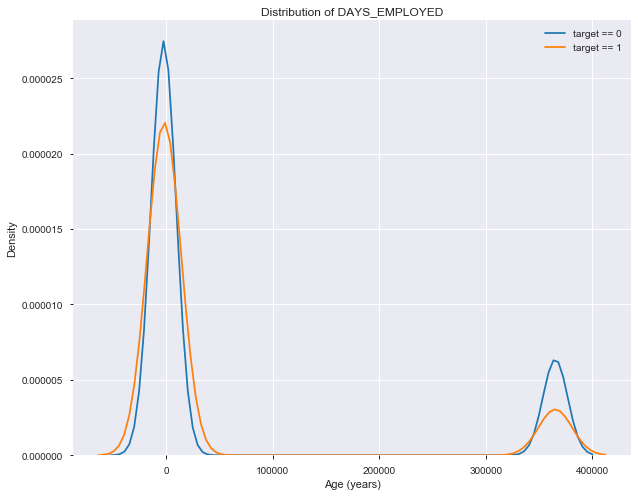

In [64]:
plot_number('DAYS_EMPLOYED')

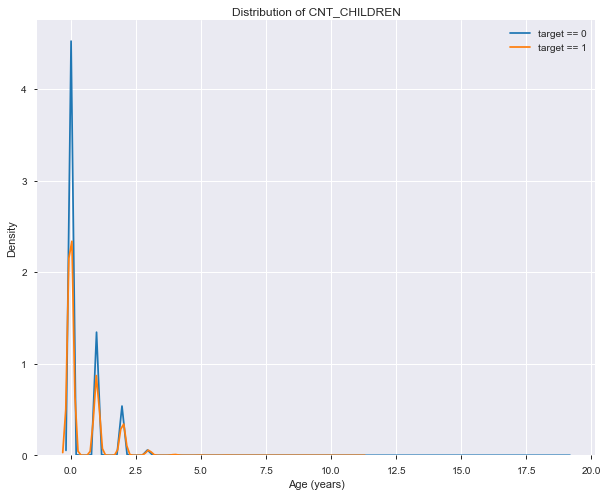

In [59]:
plot_number('CNT_CHILDREN')

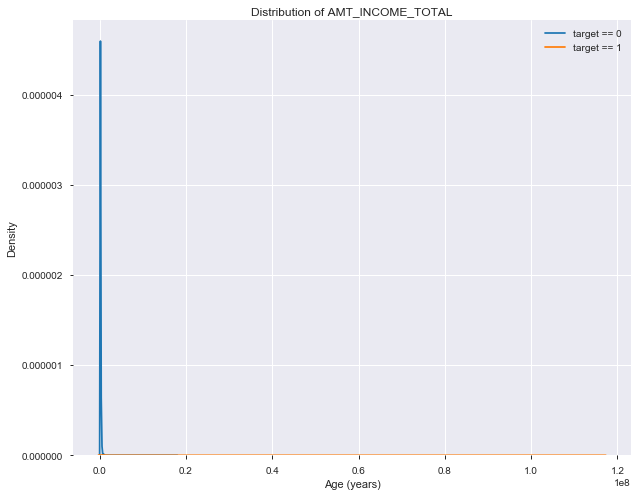

In [60]:
plot_number('AMT_INCOME_TOTAL')

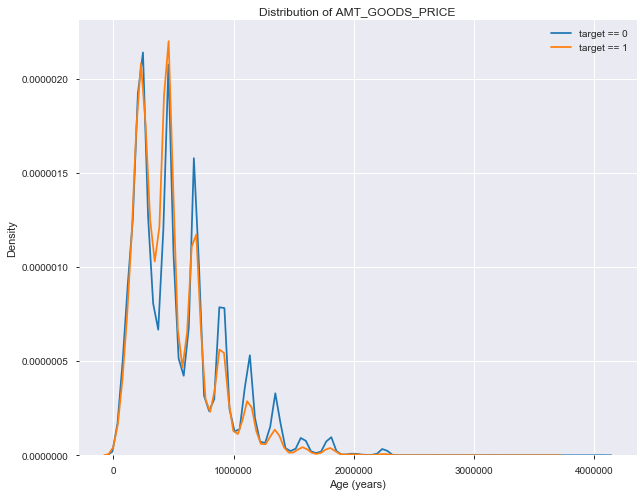

In [65]:
plot_number('AMT_GOODS_PRICE')

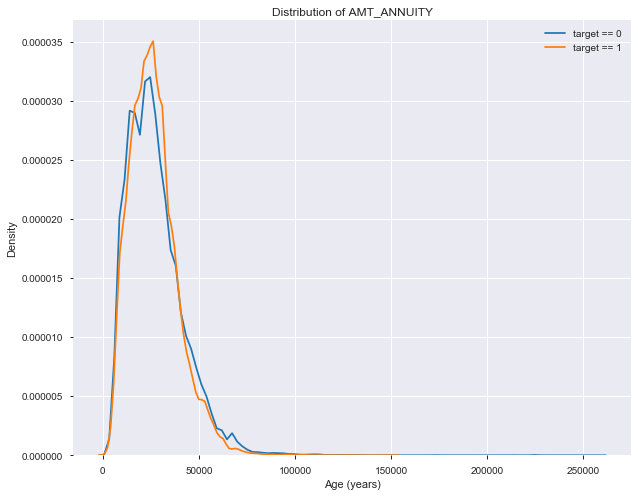

In [66]:
plot_number('AMT_ANNUITY')

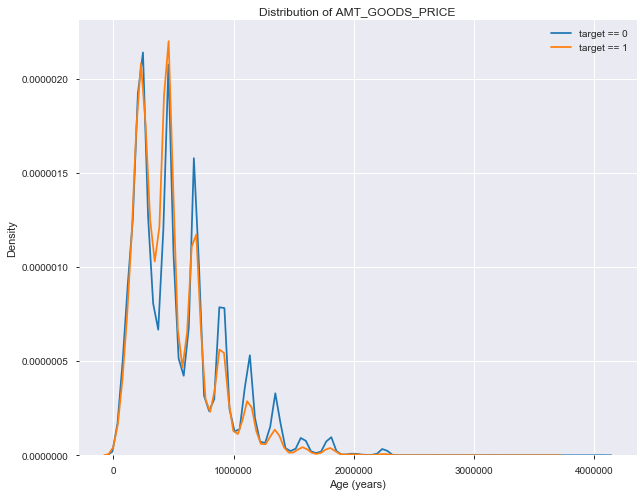

In [67]:
plot_number('AMT_GOODS_PRICE')

In [70]:
names = df_number.columns
names

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

## Target = 0, 1に分けて密度分布を表示

error for TARGET
error for FLAG_MOBIL
error for FLAG_DOCUMENT_4
error for FLAG_DOCUMENT_10
error for FLAG_DOCUMENT_12


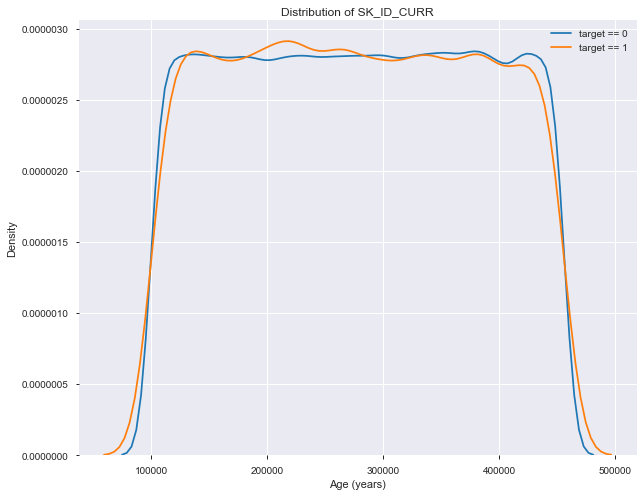

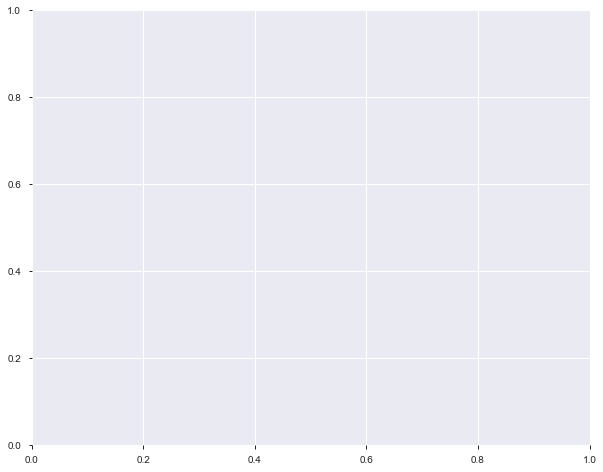

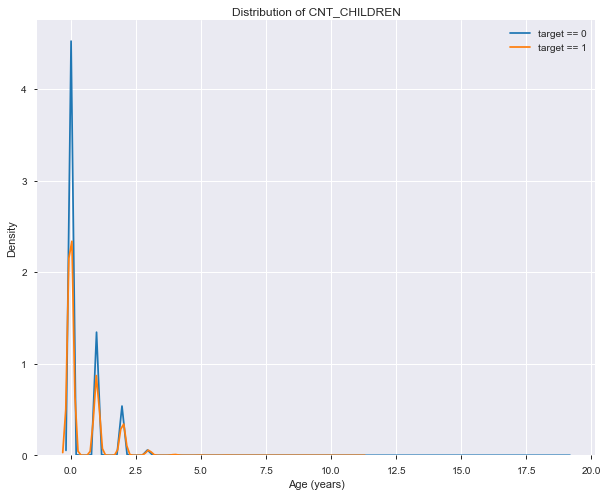

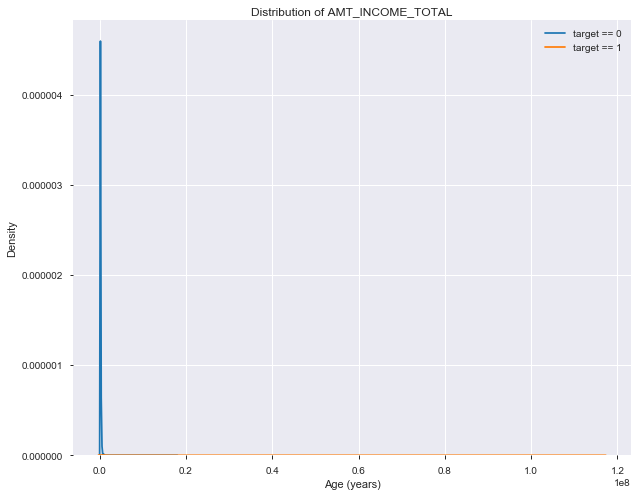

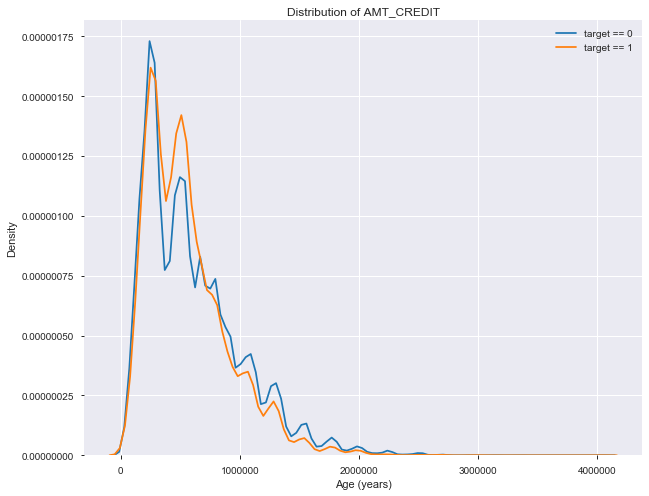

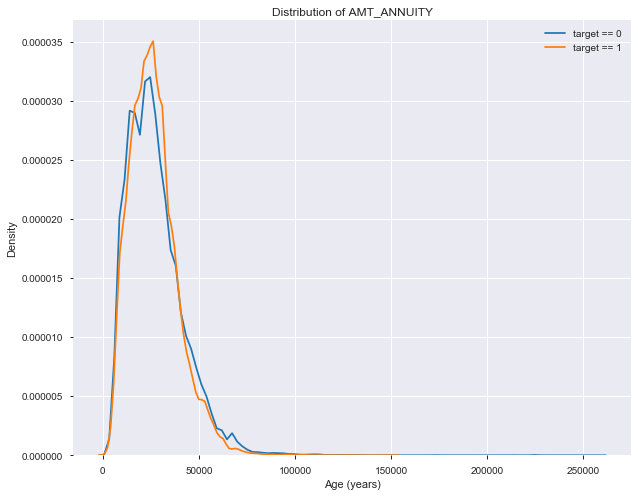

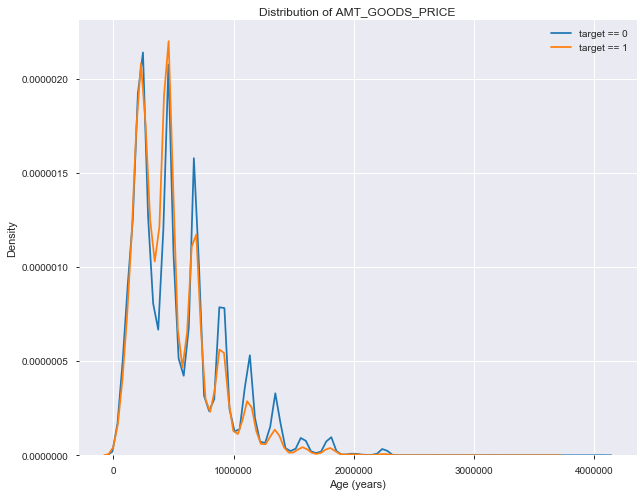

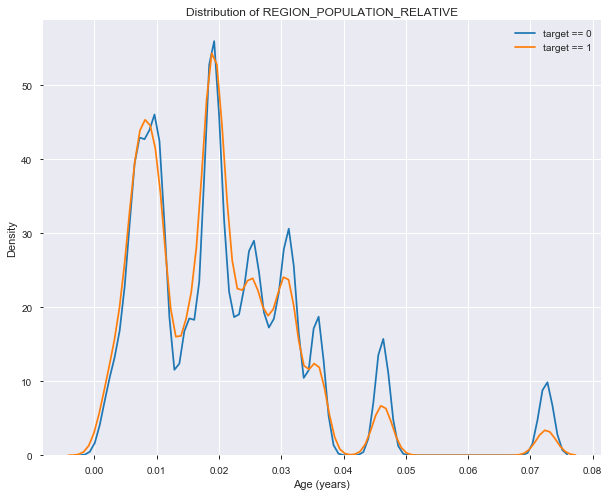

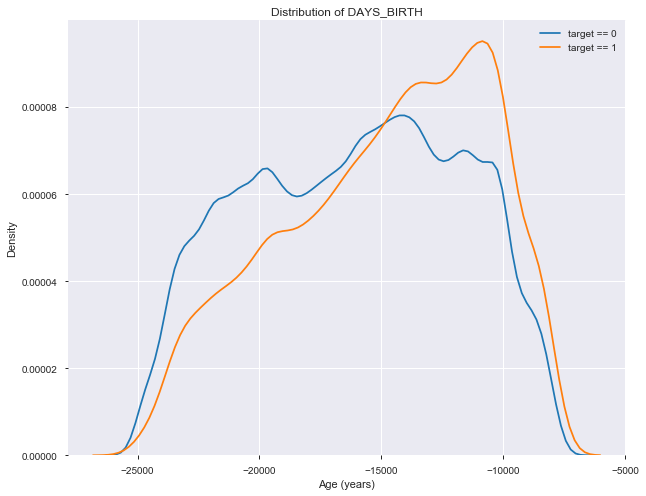

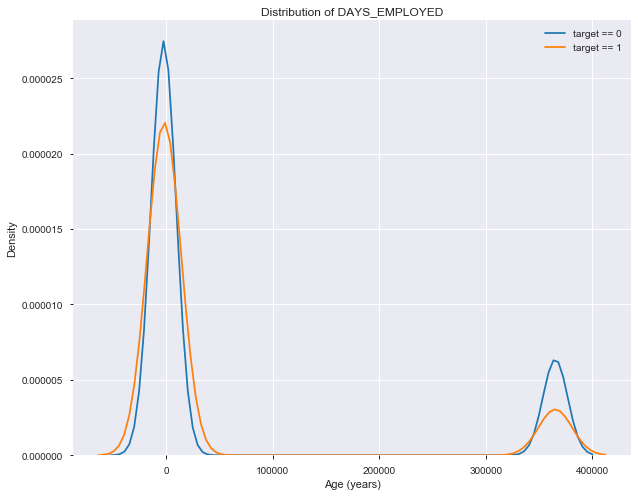

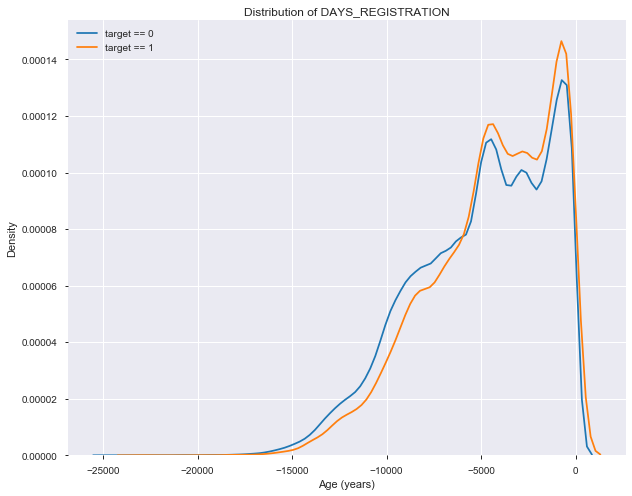

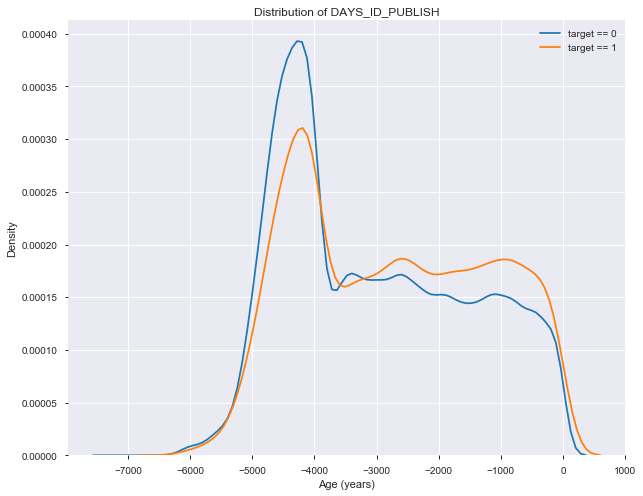

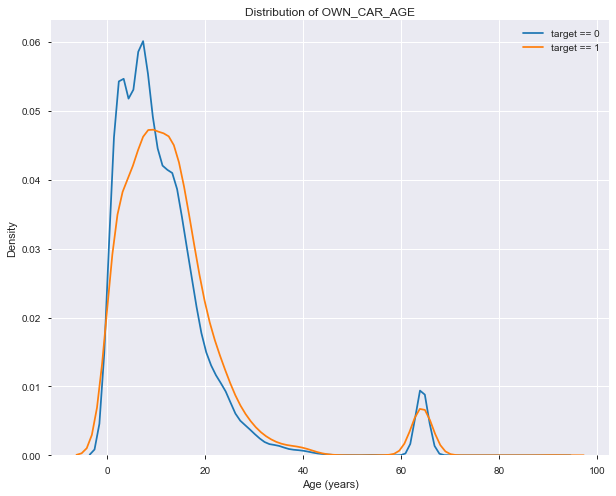

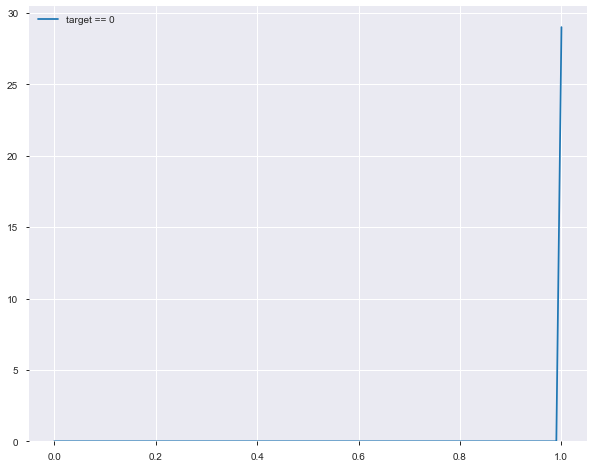

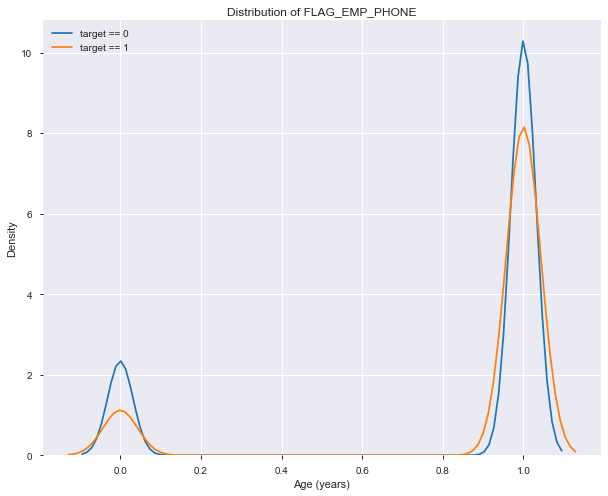

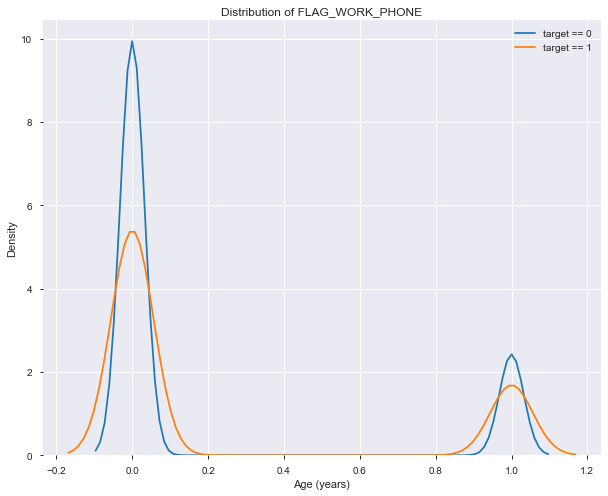

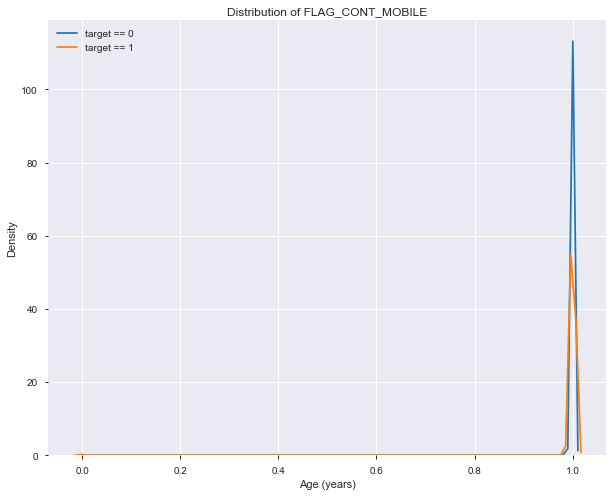

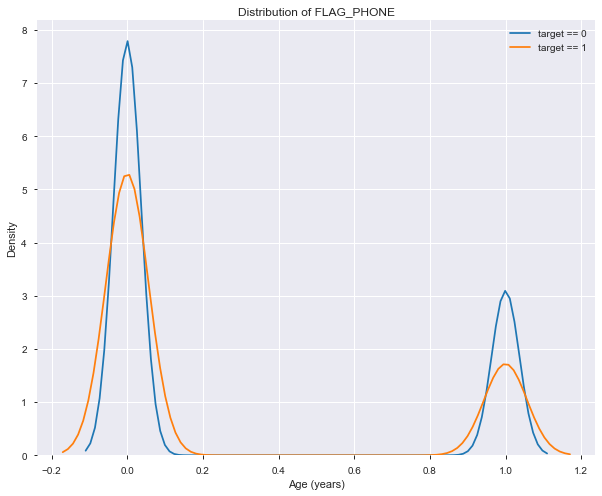

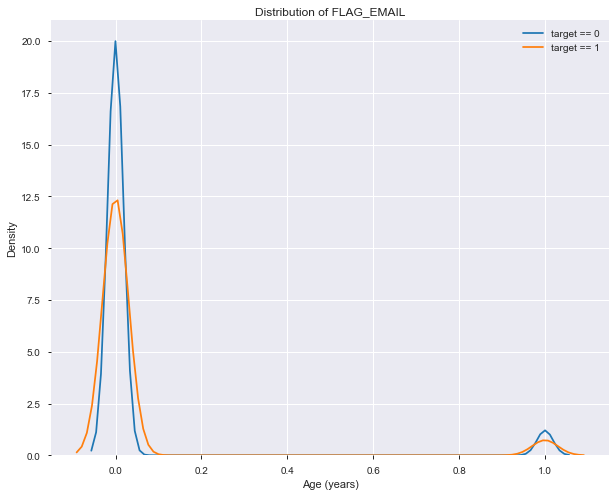

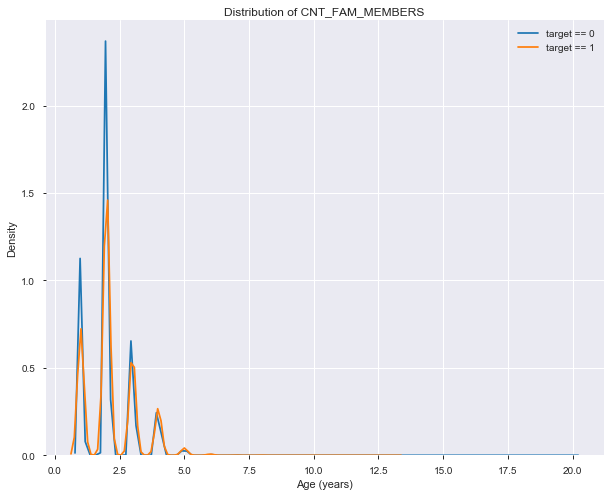

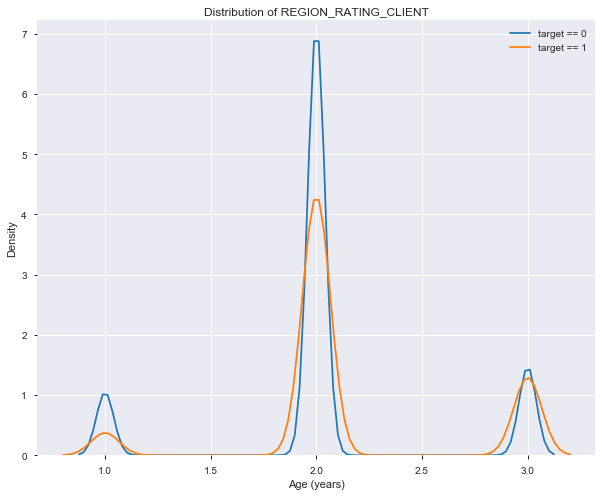

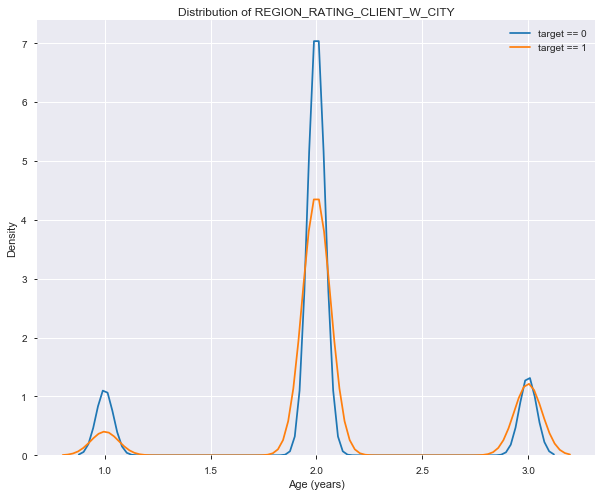

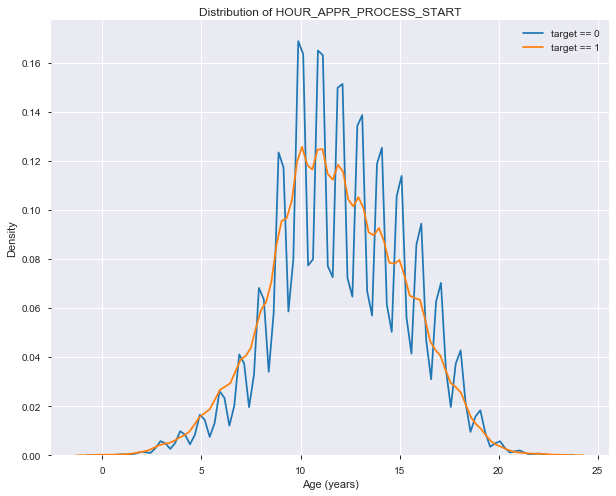

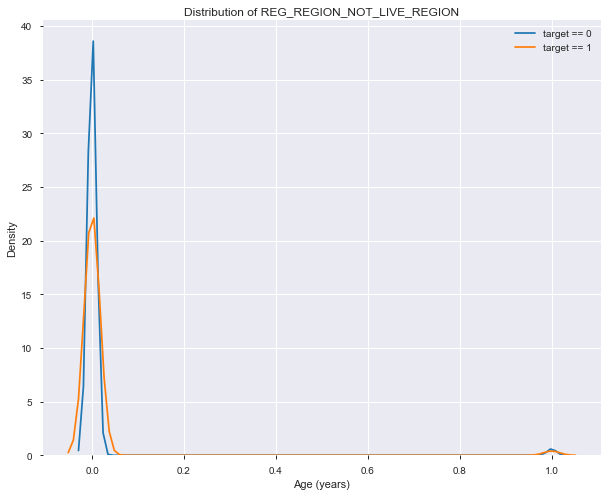

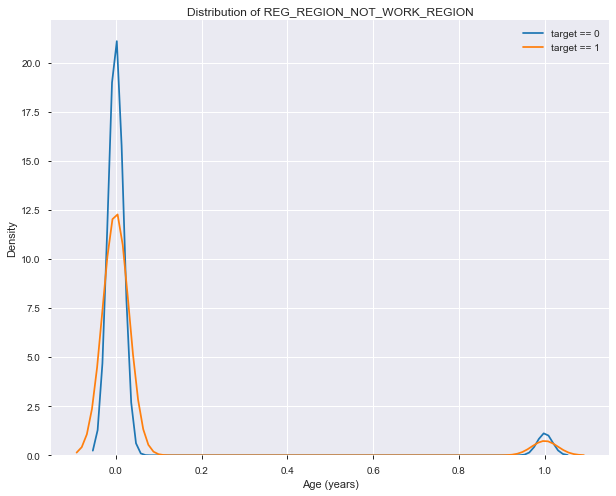

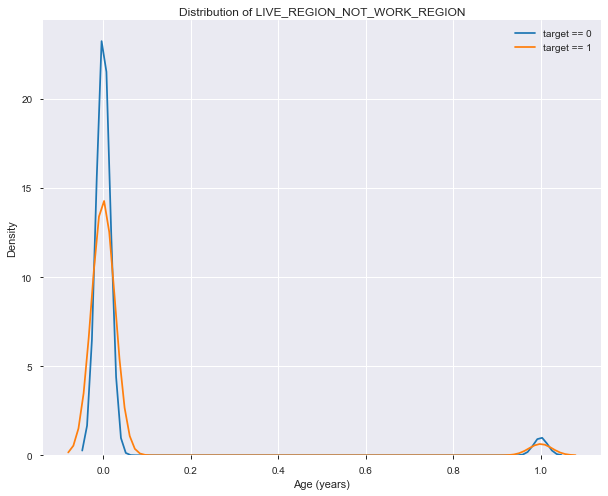

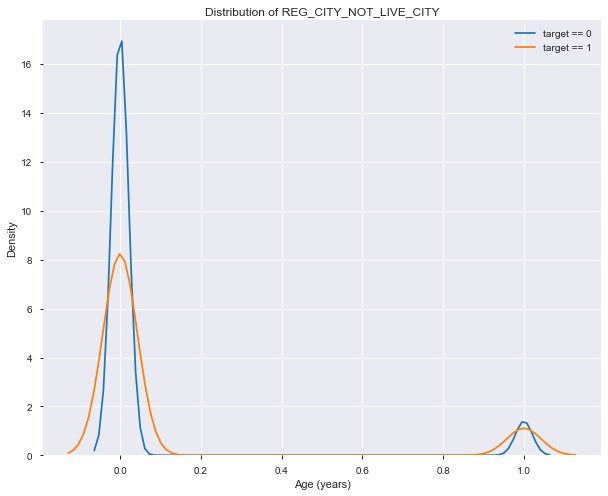

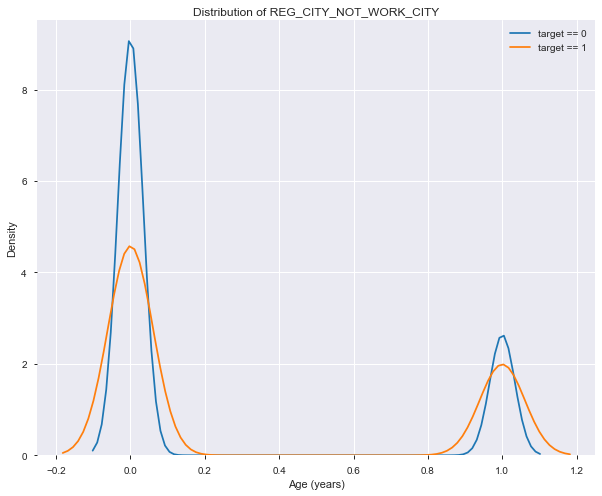

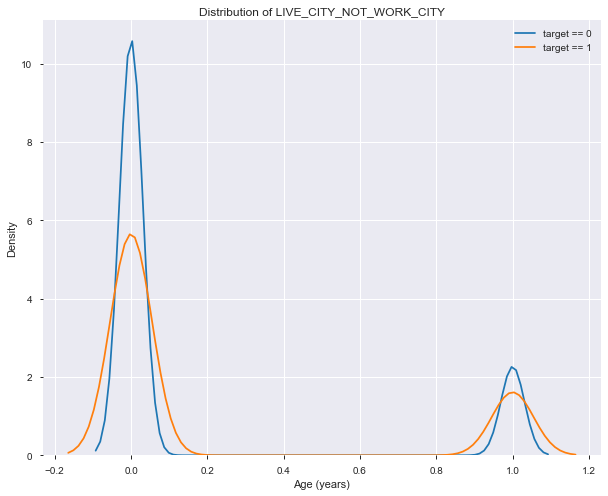

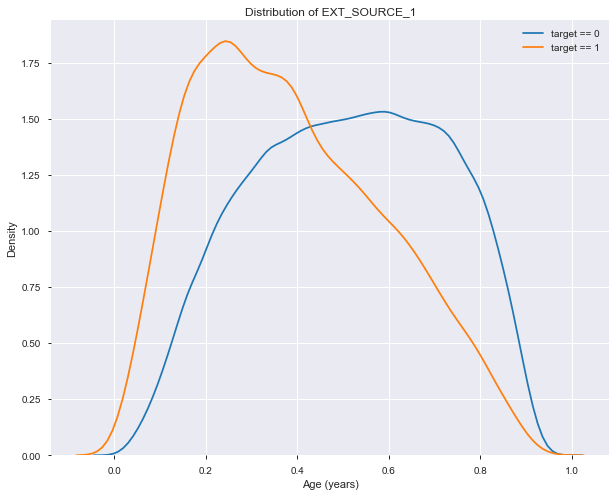

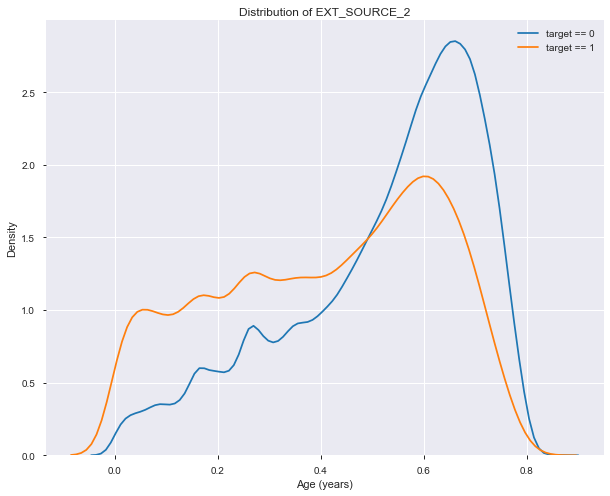

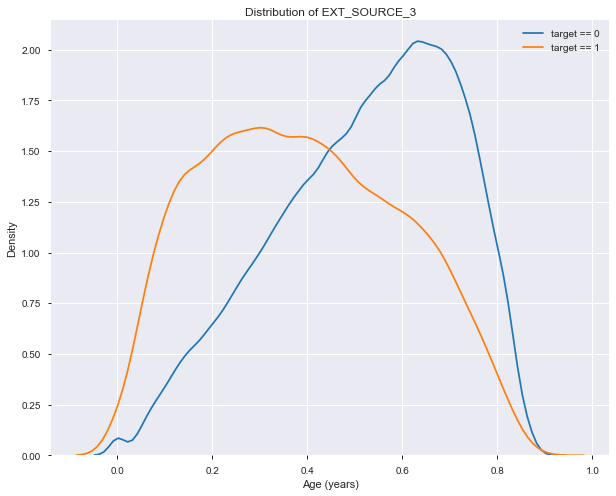

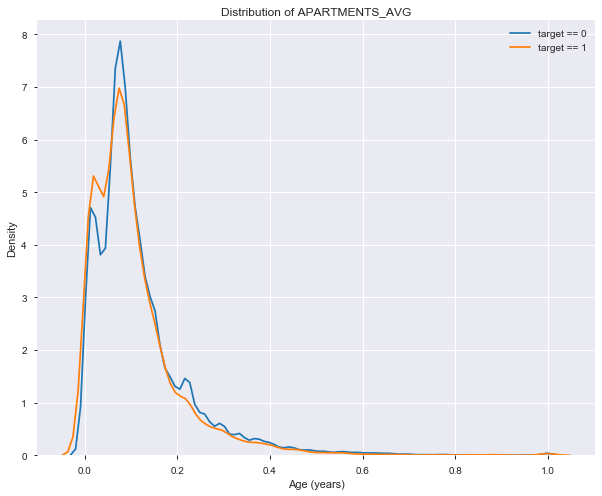

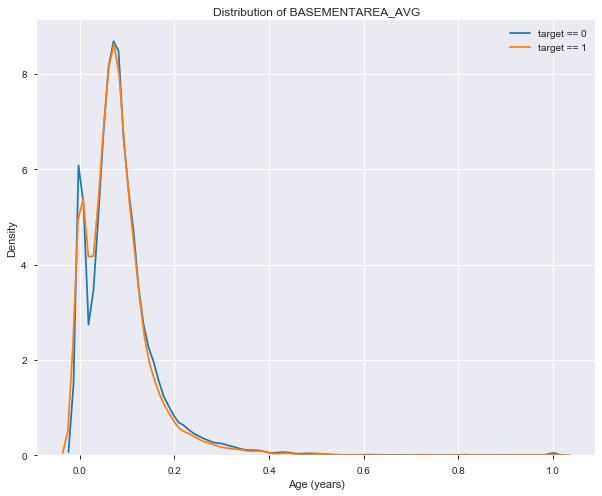

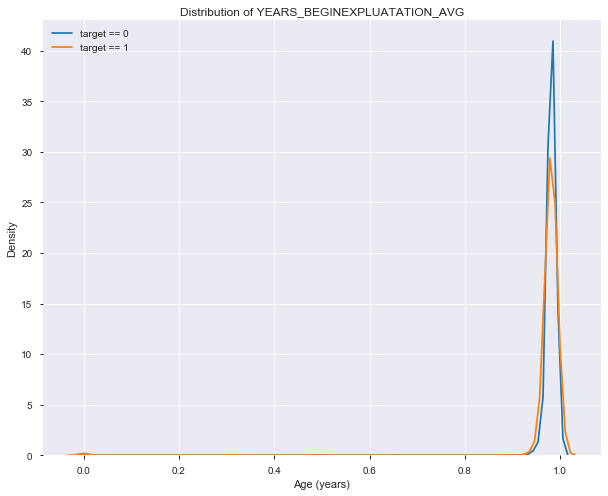

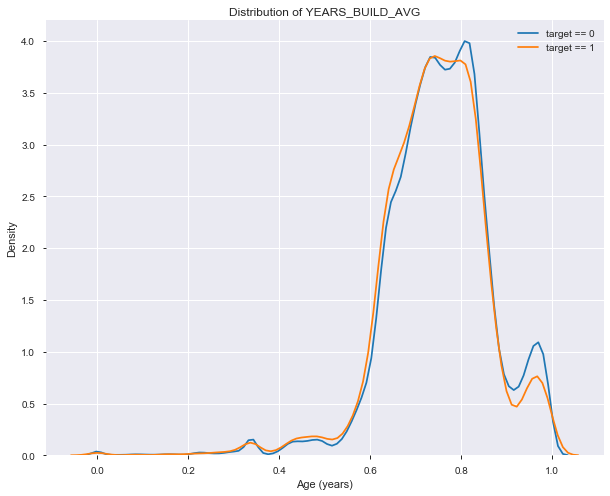

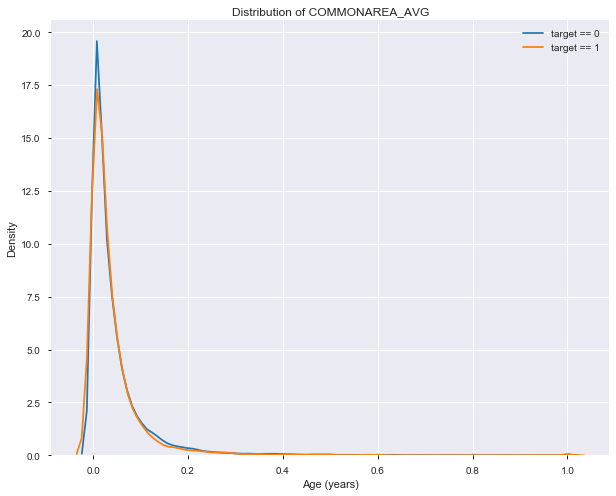

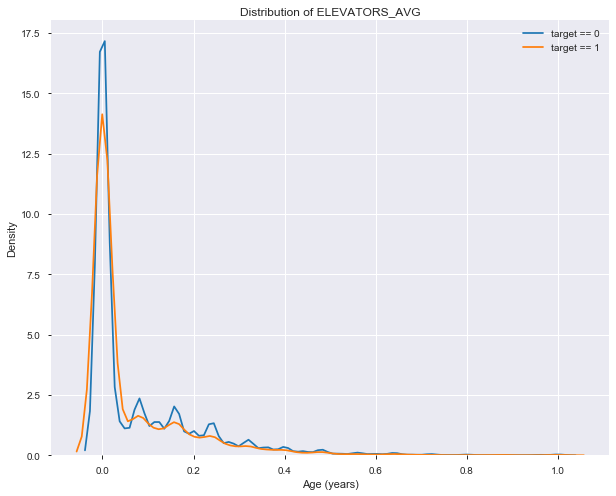

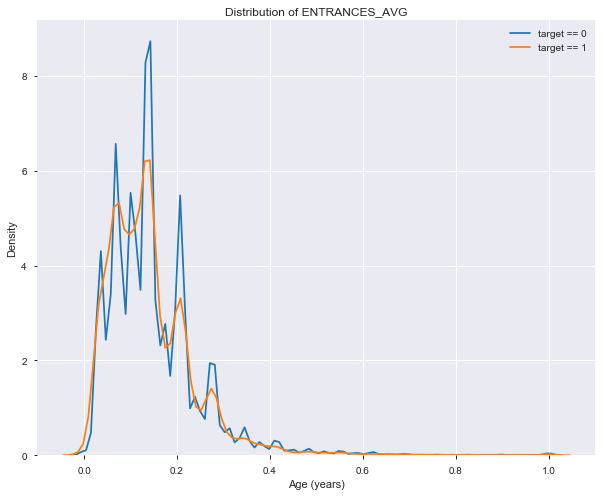

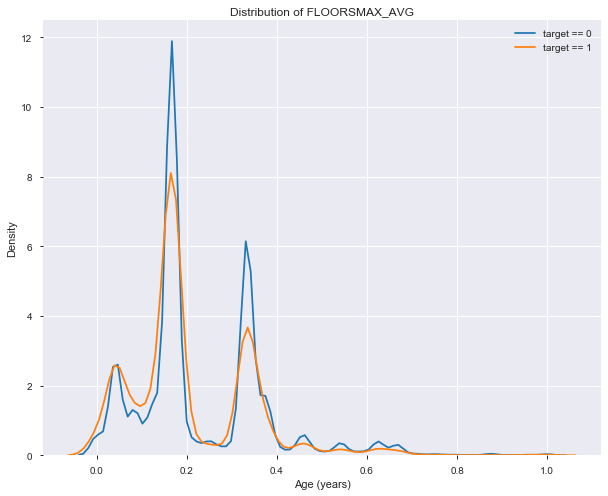

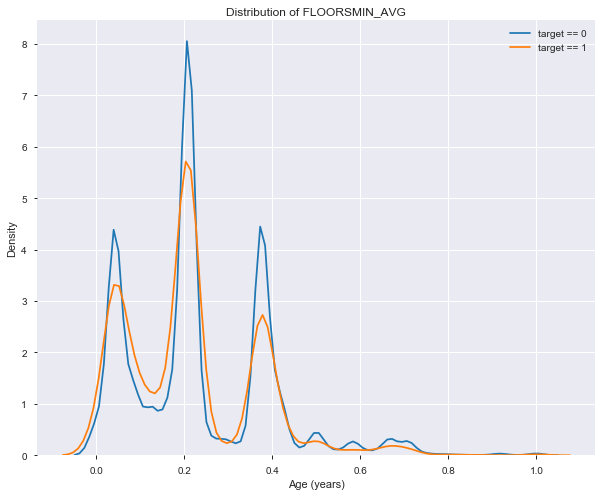

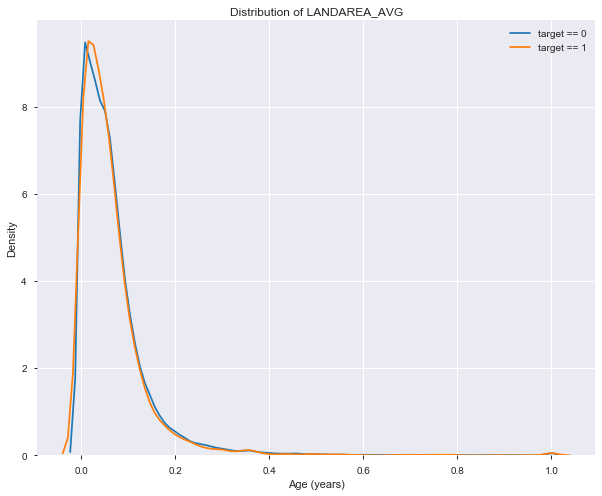

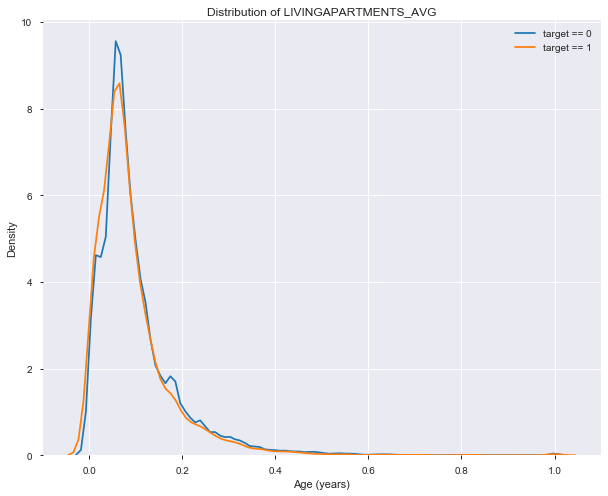

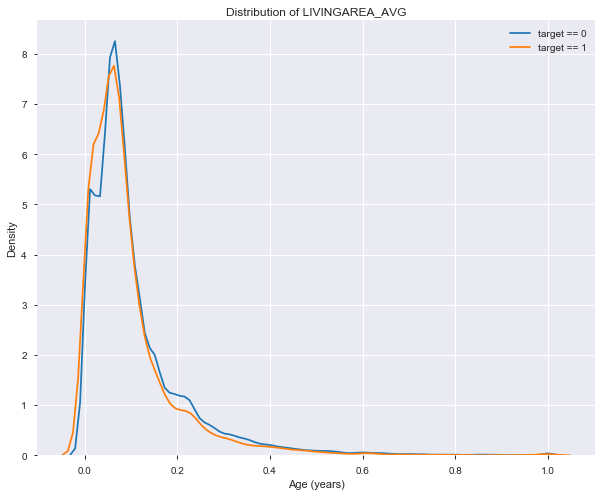

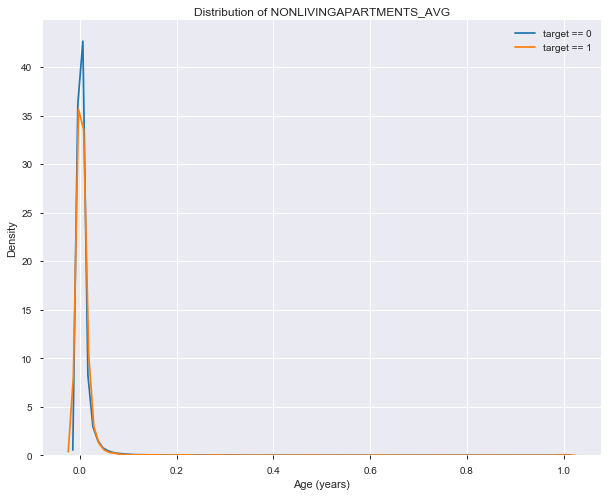

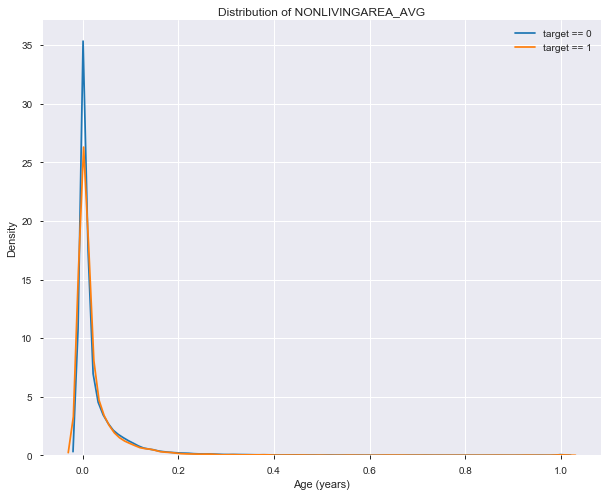

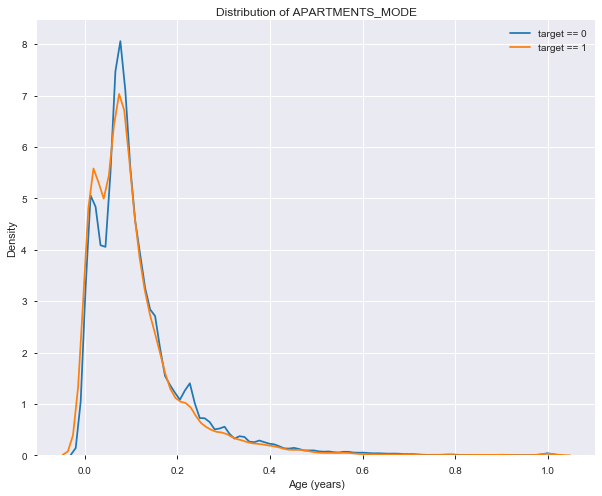

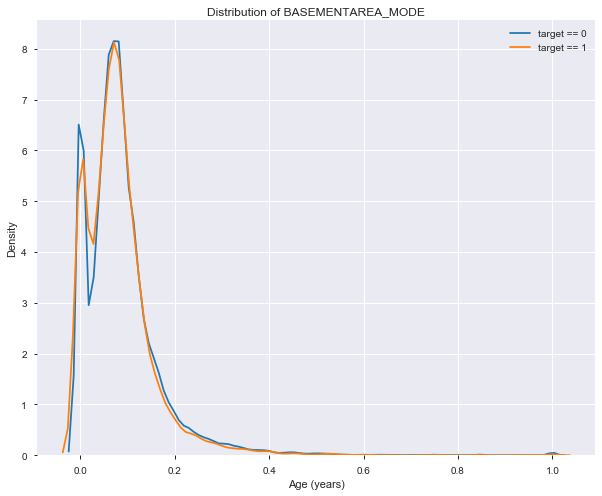

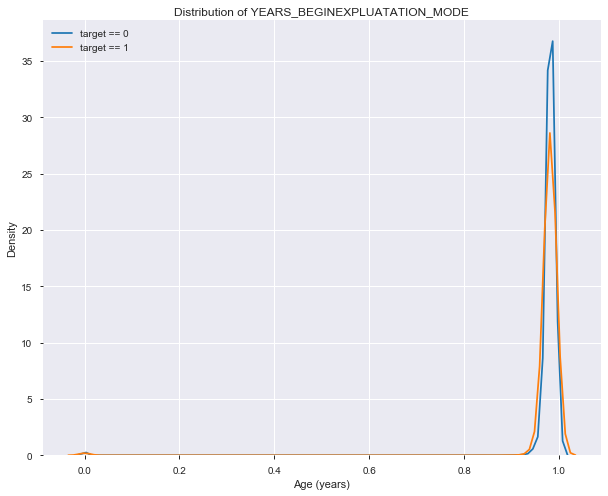

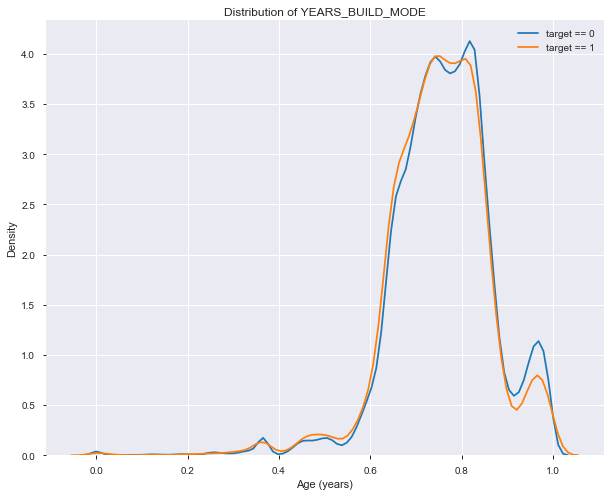

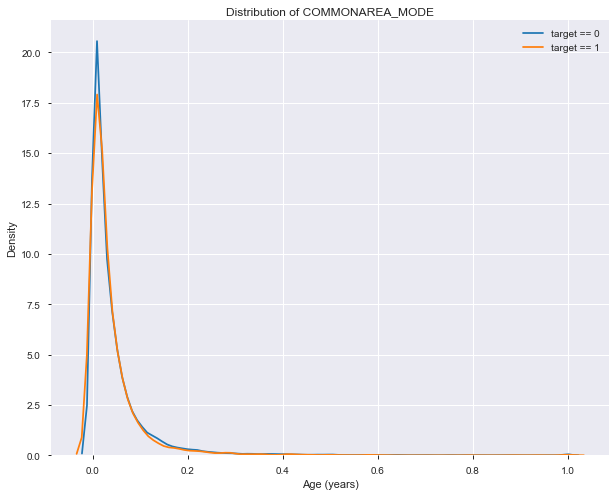

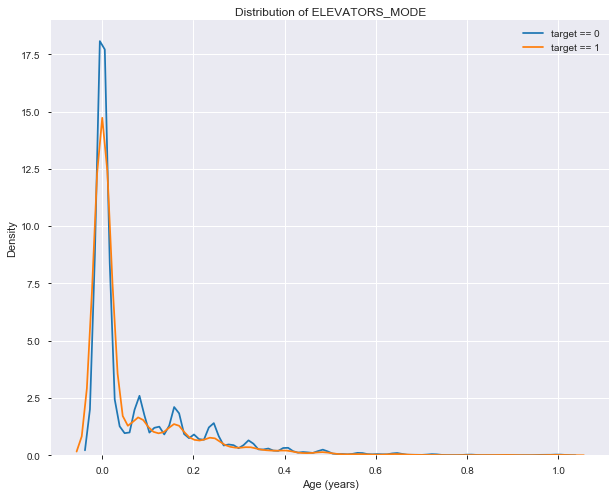

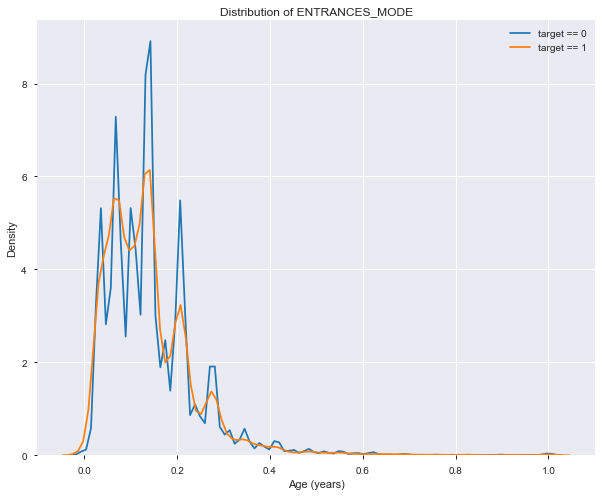

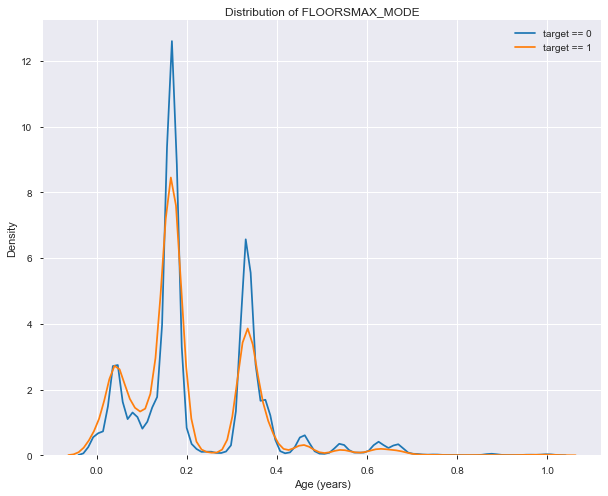

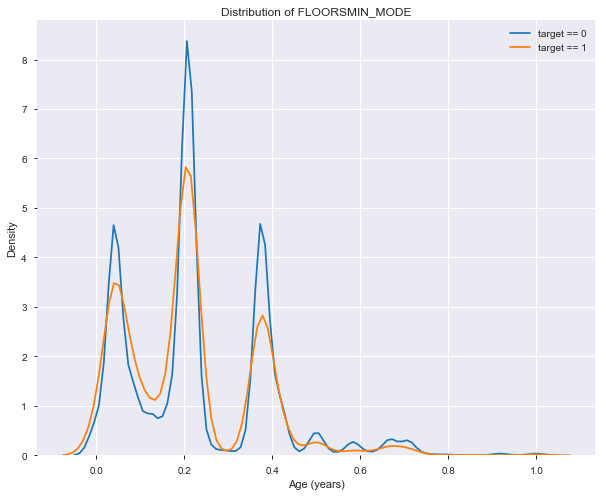

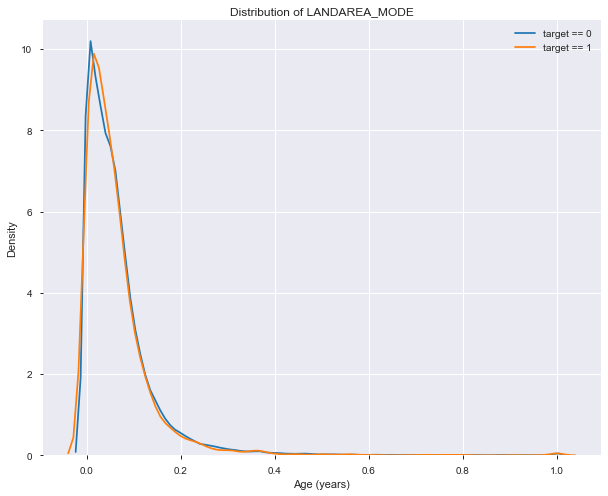

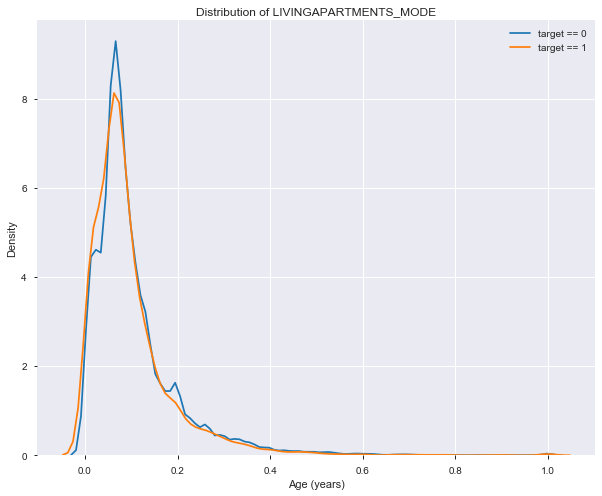

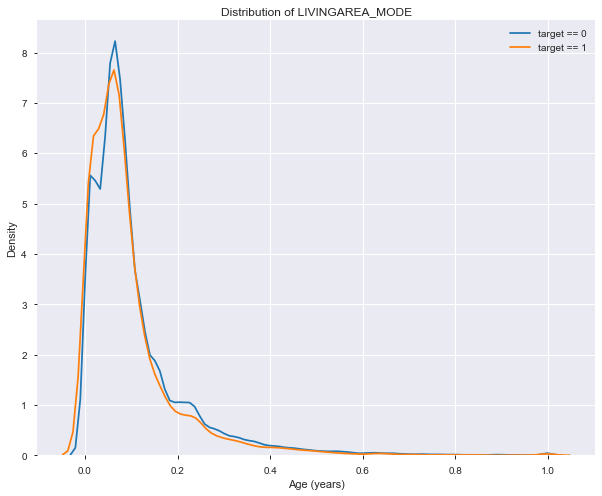

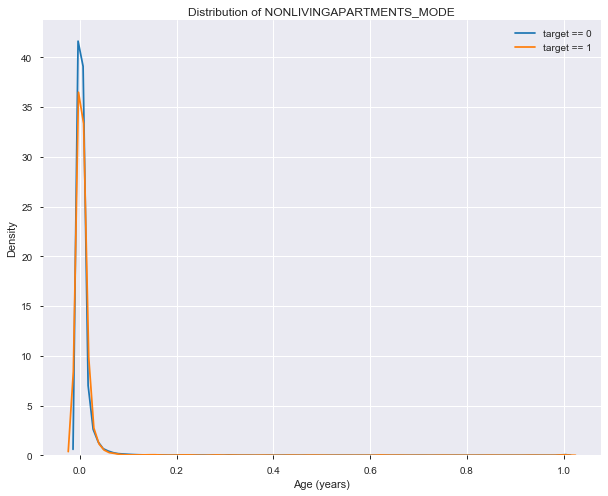

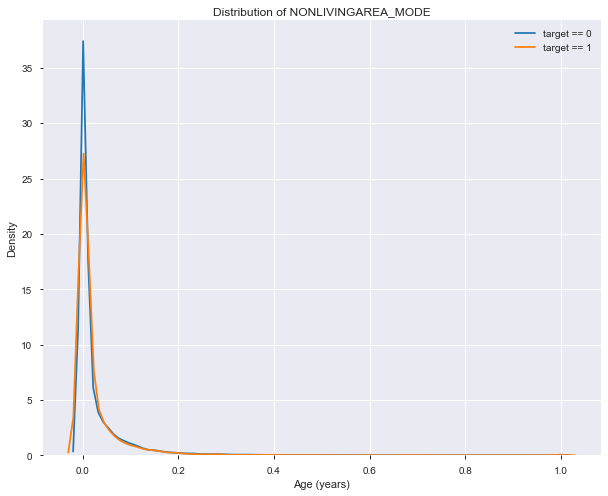

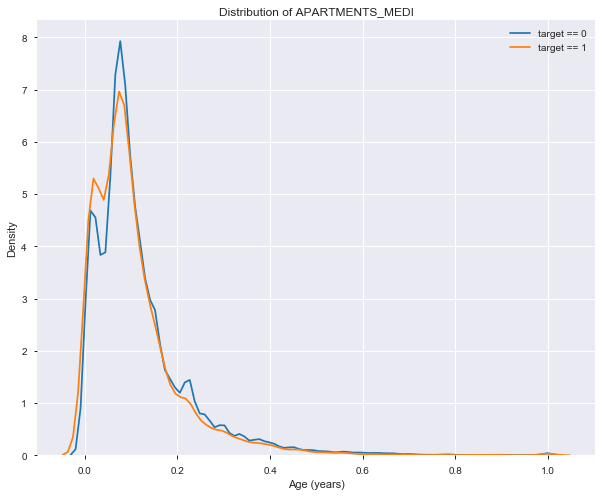

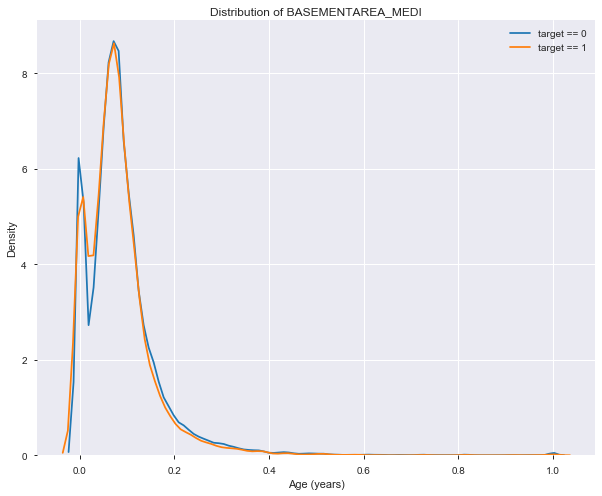

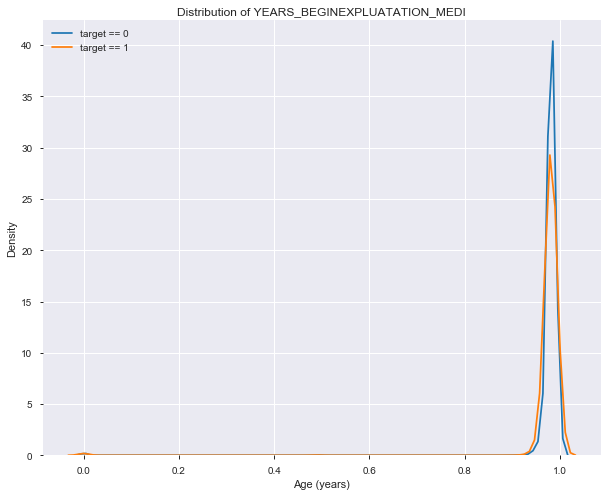

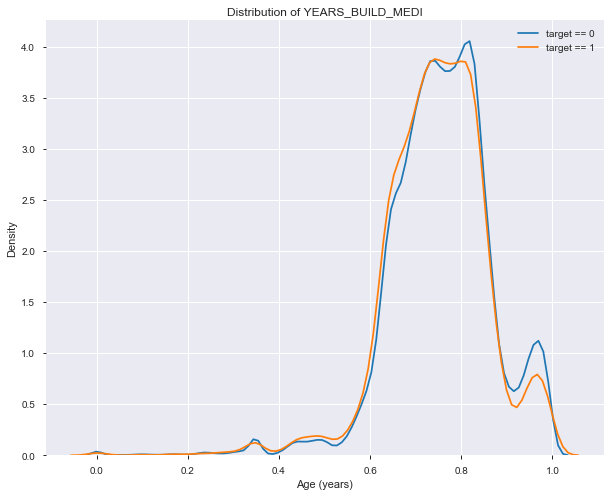

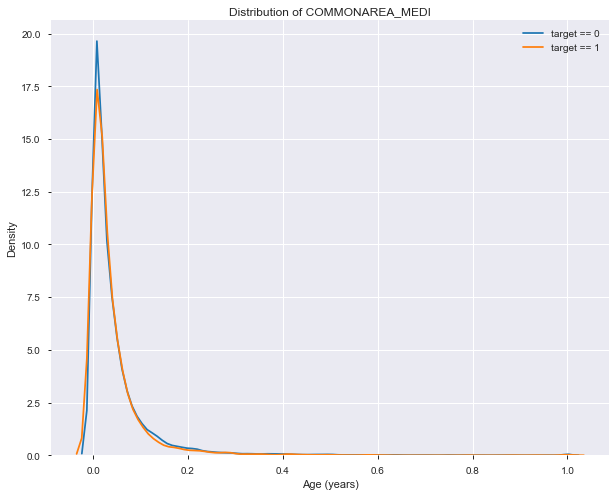

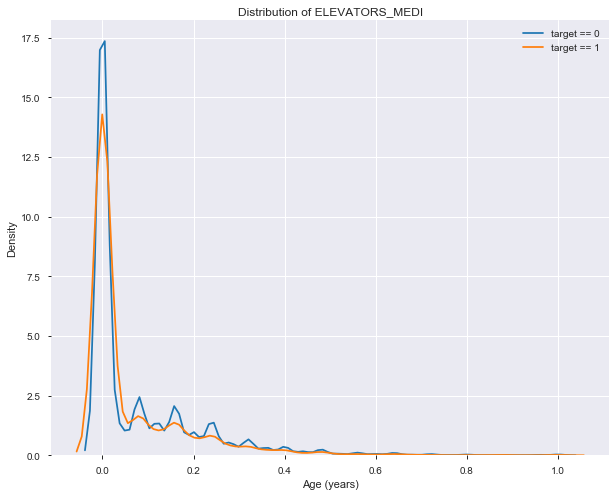

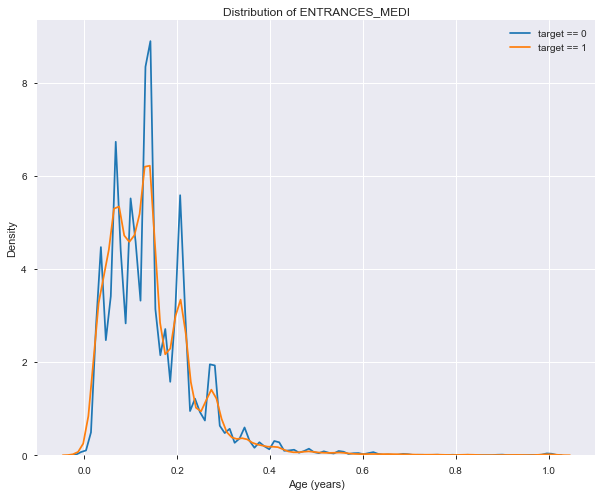

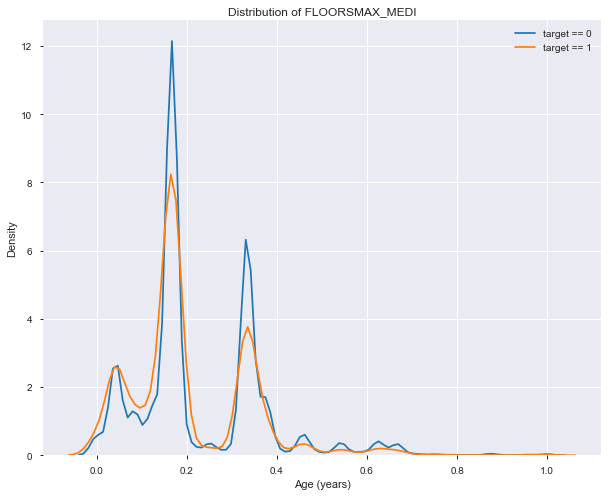

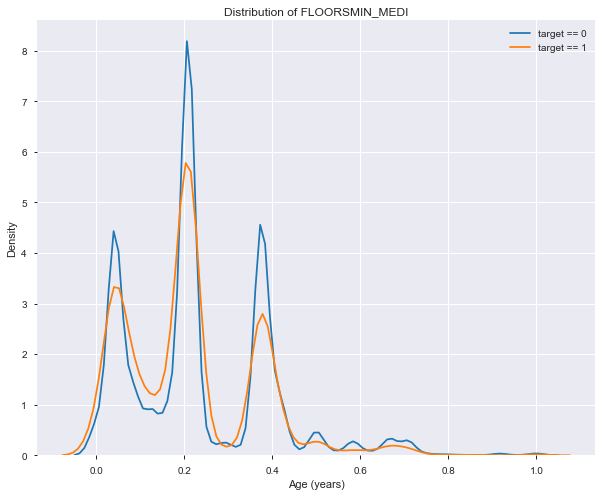

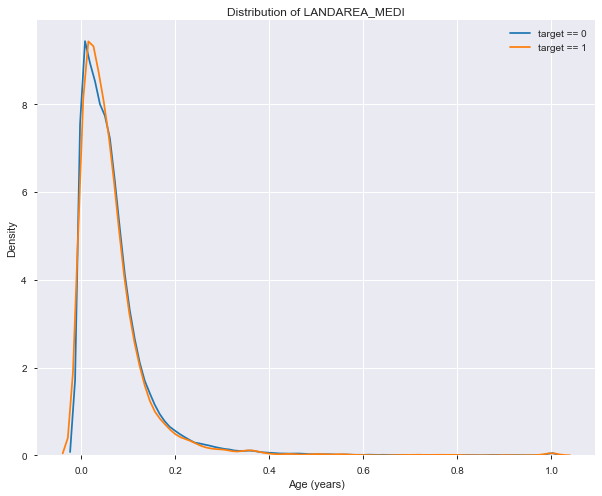

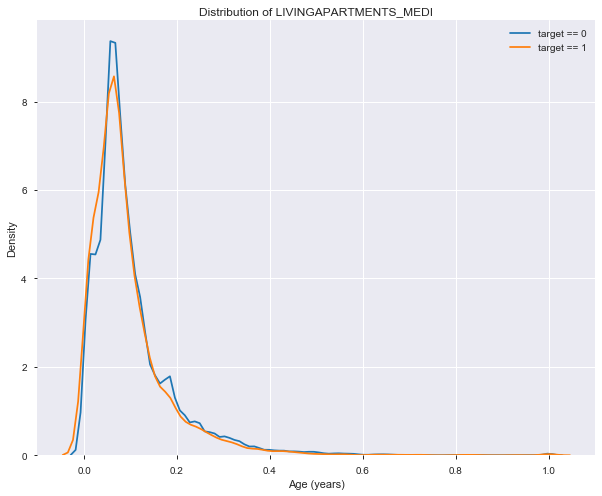

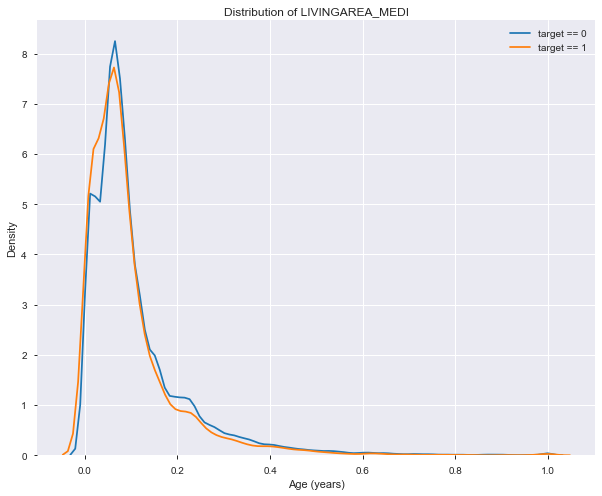

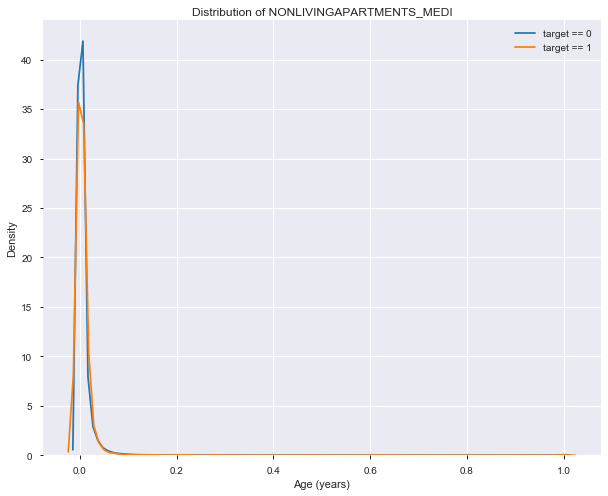

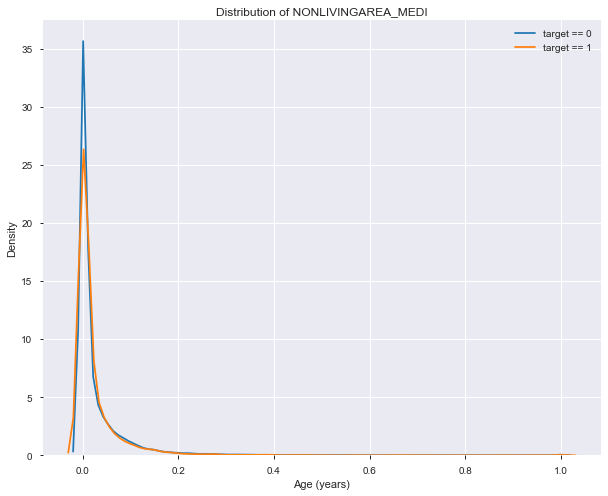

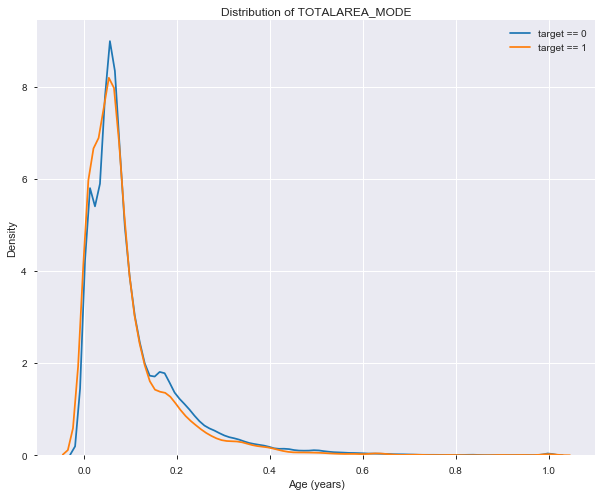

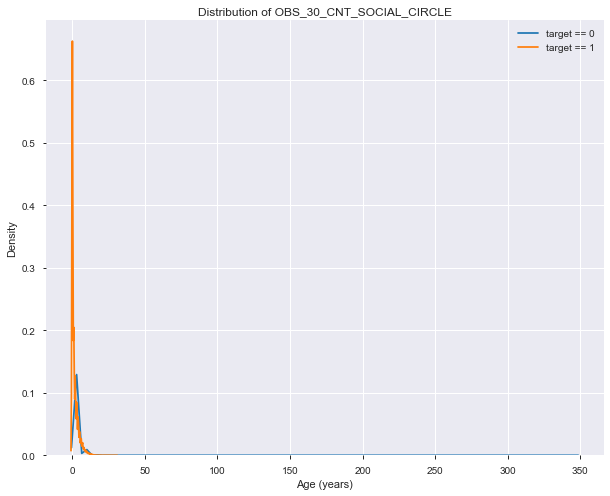

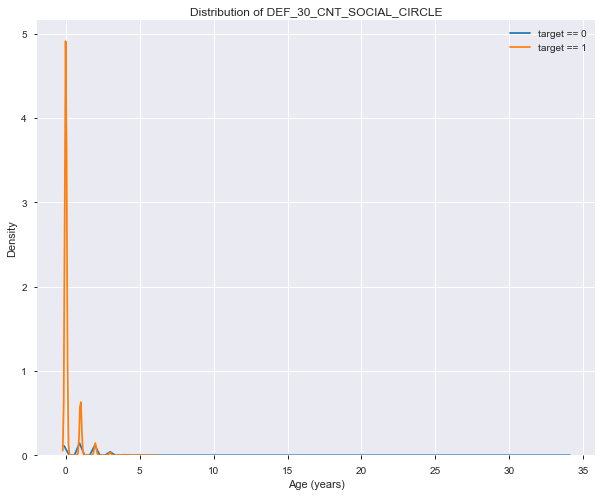

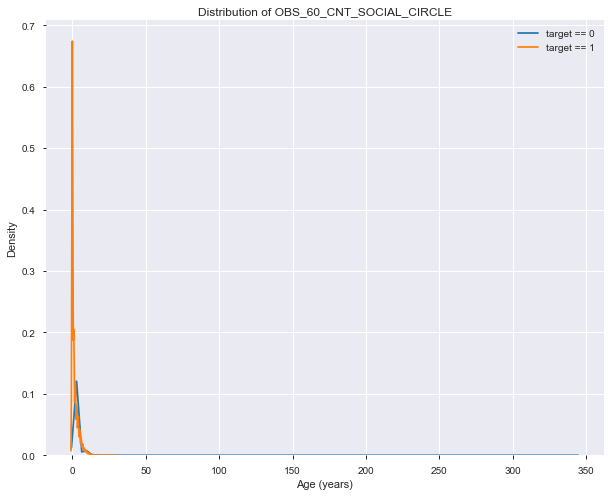

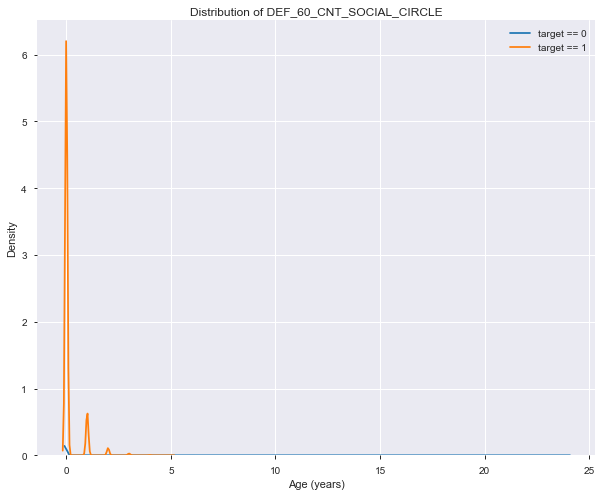

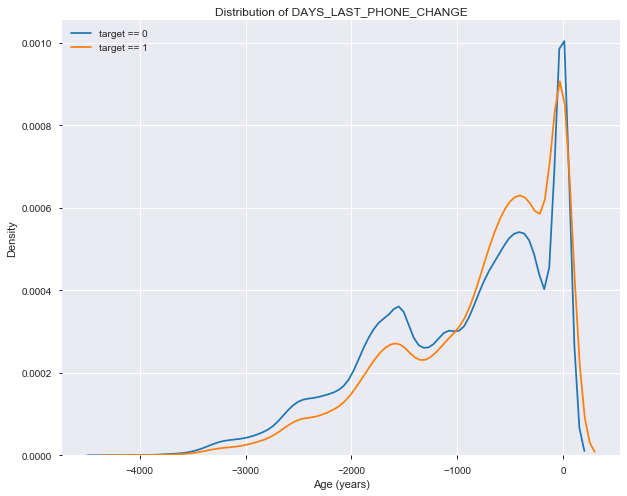

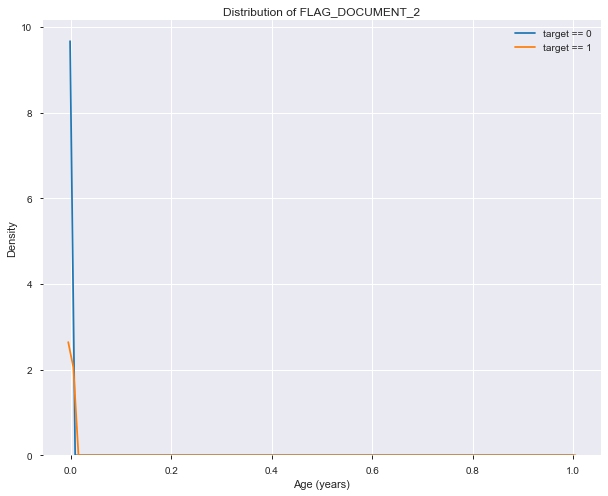

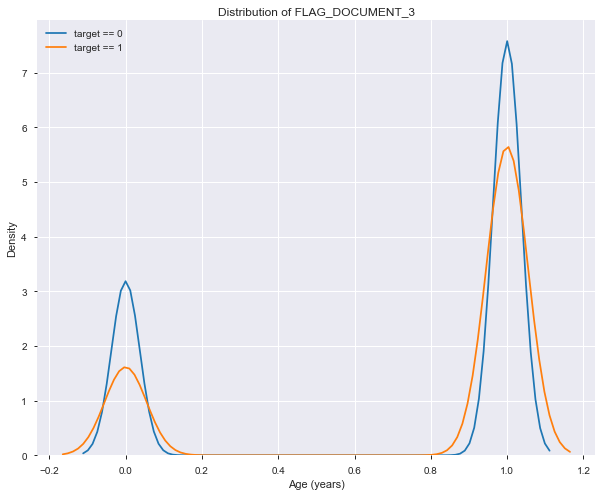

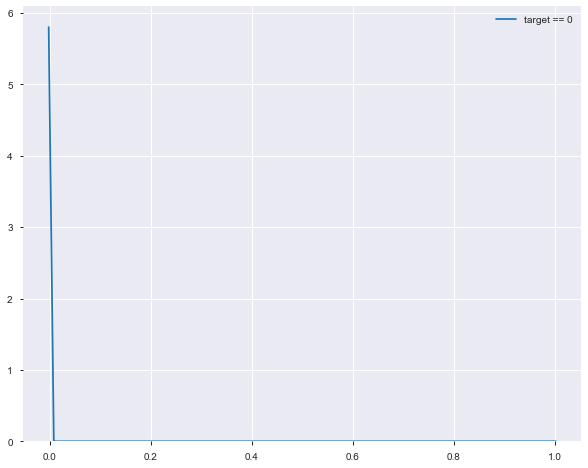

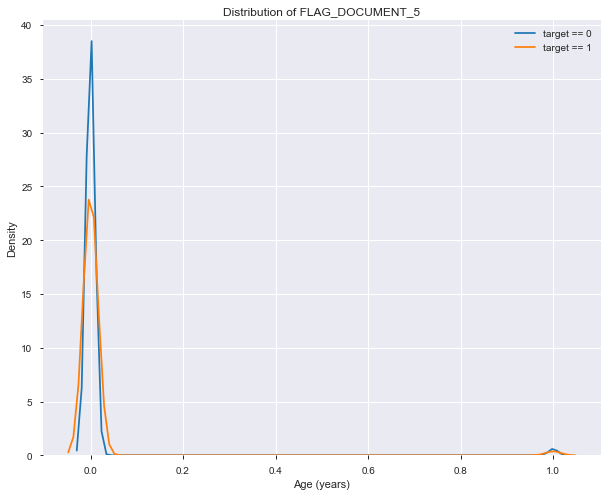

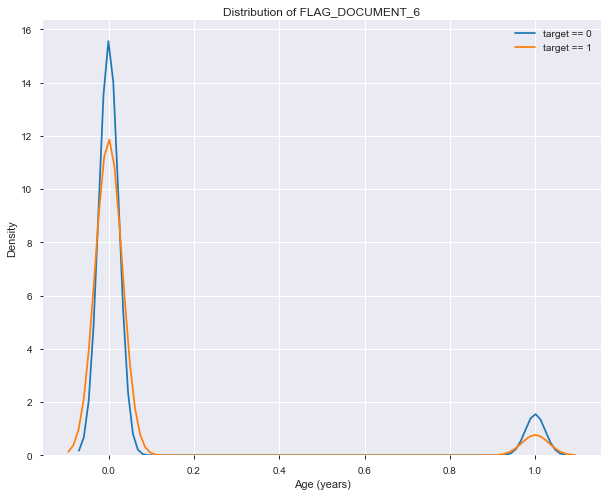

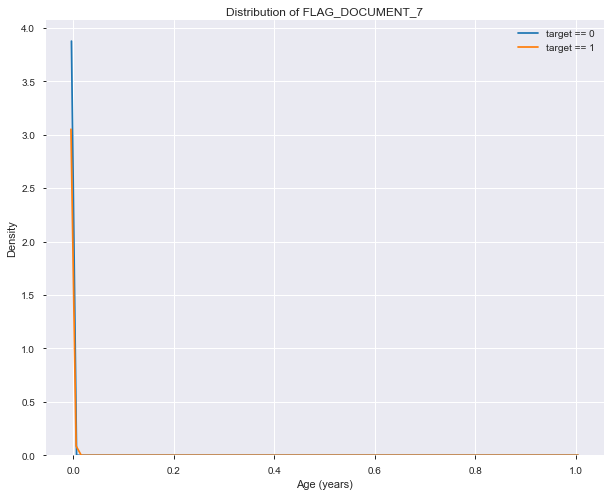

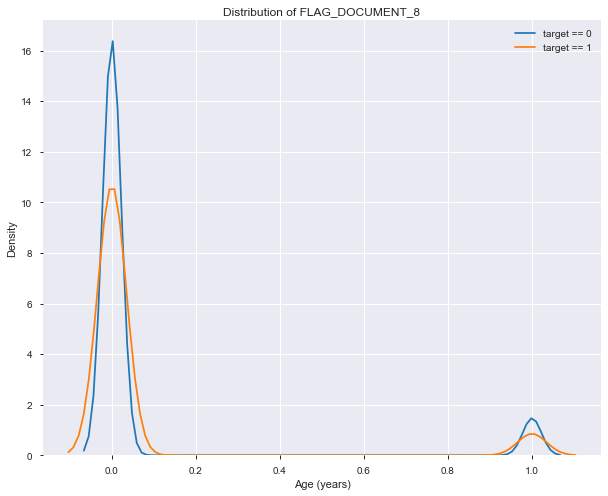

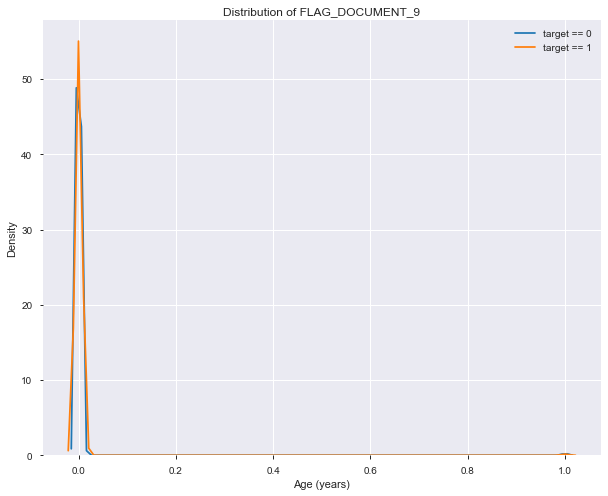

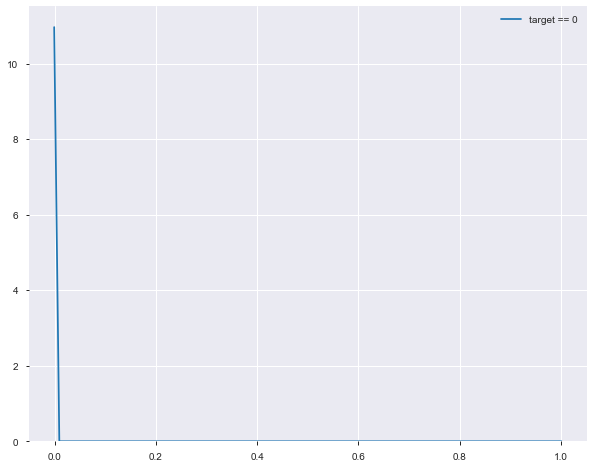

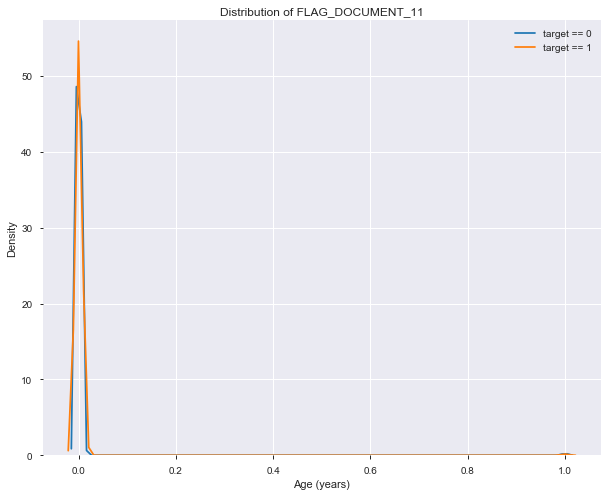

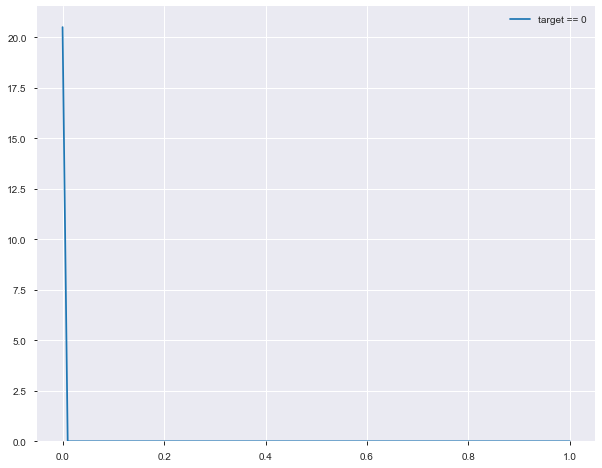

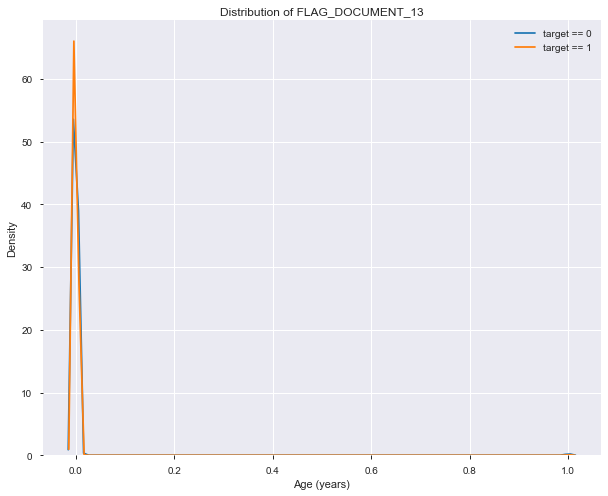

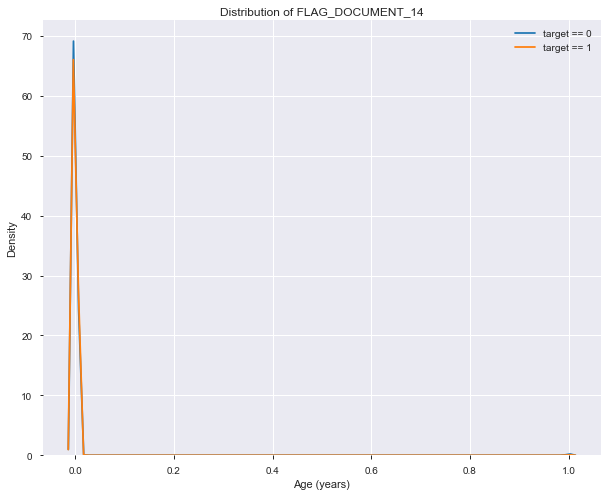

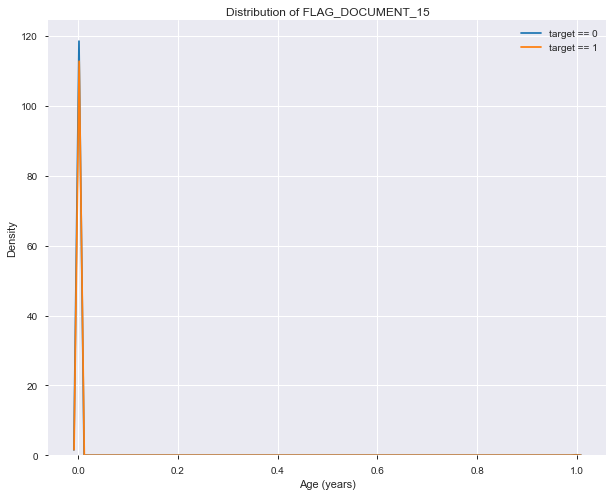

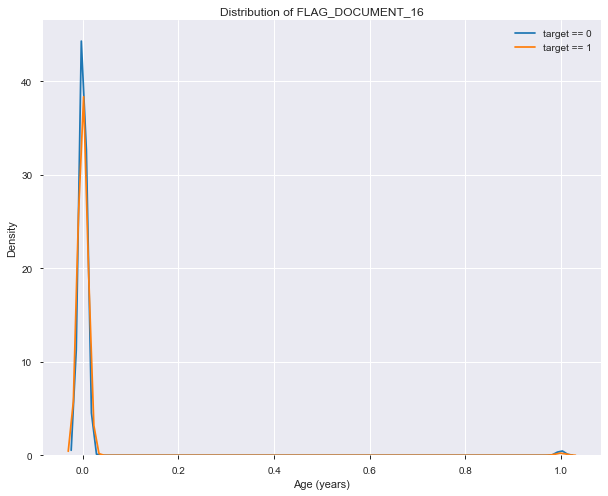

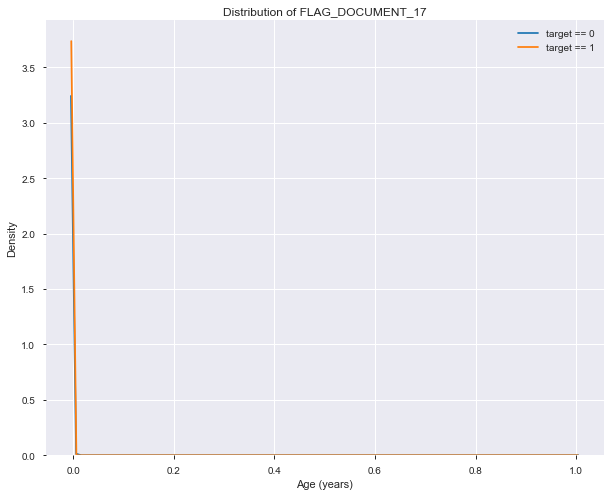

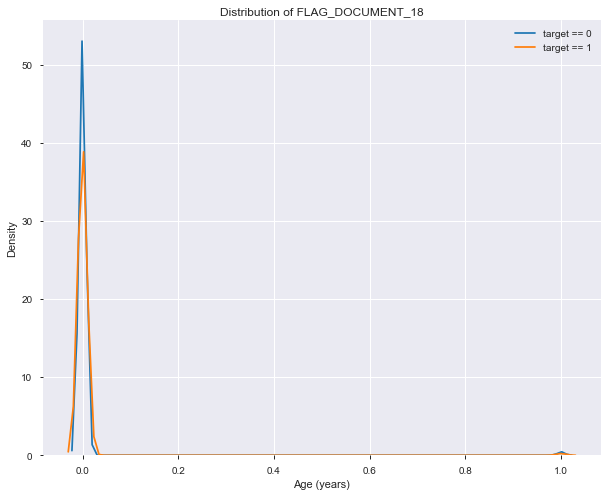

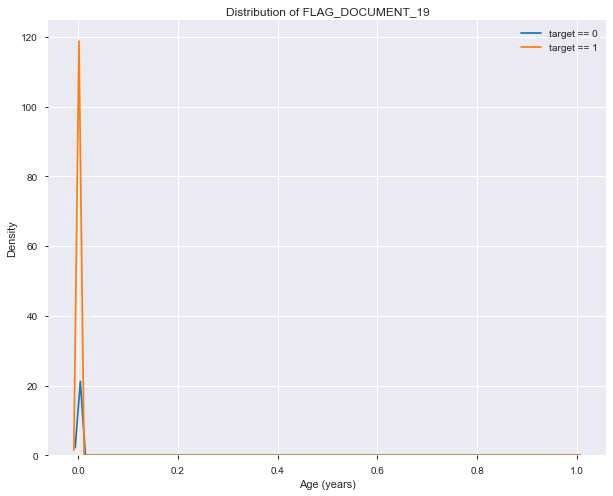

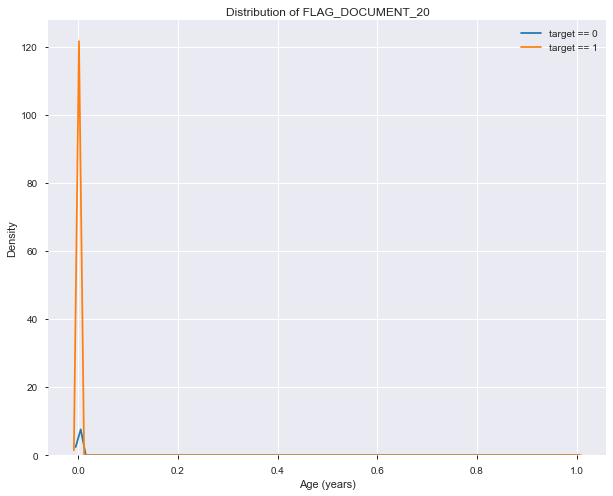

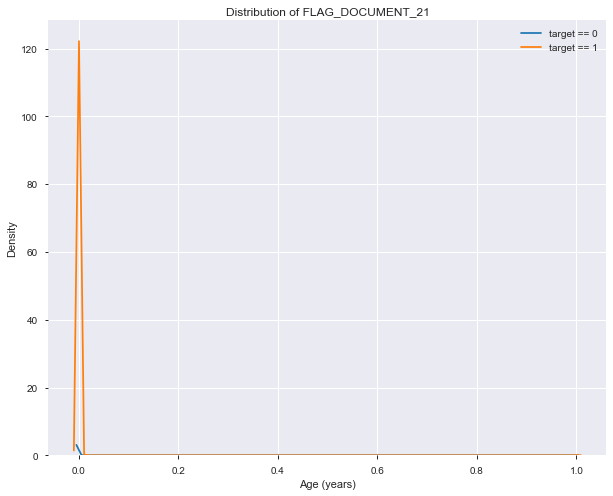

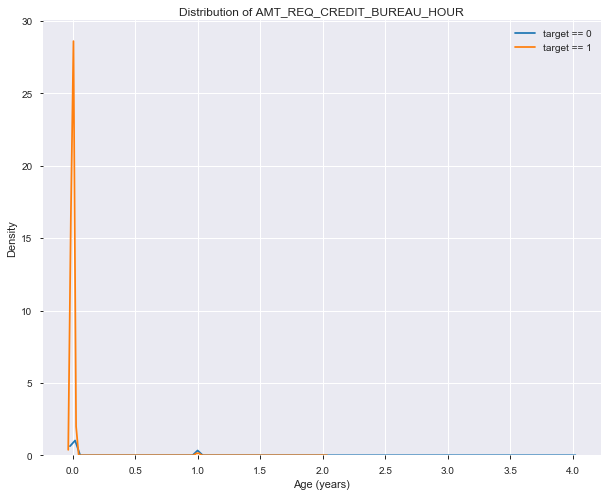

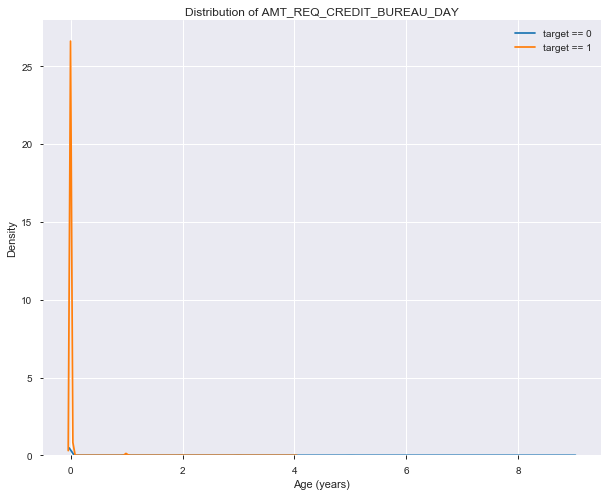

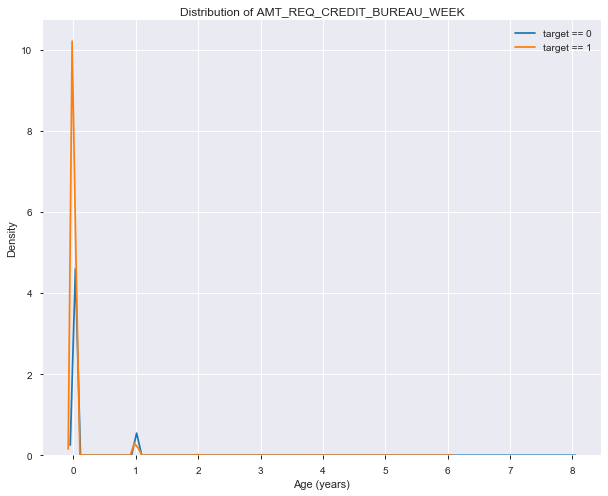

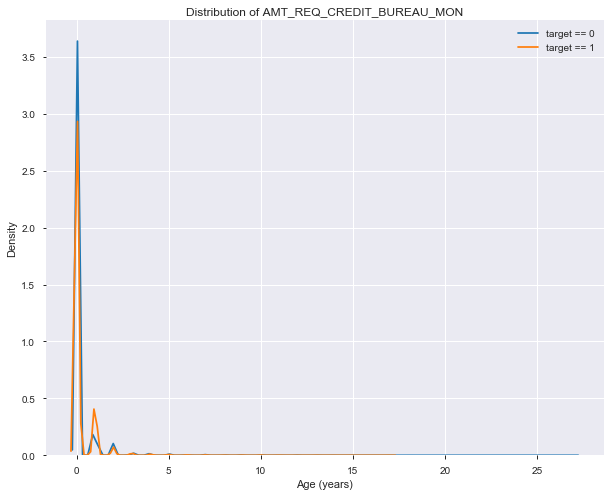

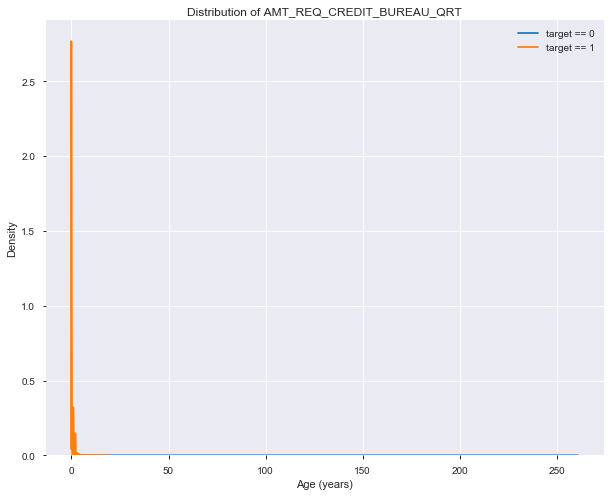

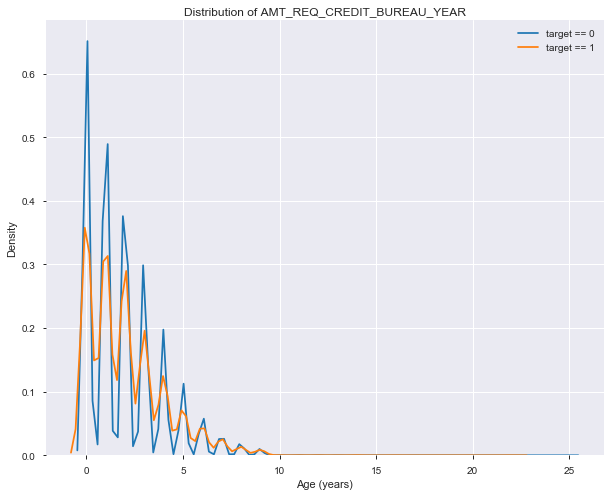

In [72]:
for name in names:
    try:
        plot_number(name)
    except:
        print('error for {}'.format(name))

In [139]:
df_1['FLAG_WORK_PHONE'].describe()

count    24825.000000
mean         0.237825
std          0.425760
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FLAG_WORK_PHONE, dtype: float64

In [140]:
df_0['FLAG_WORK_PHONE'].describe()

count    282686.000000
mean          0.195991
std           0.396963
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_WORK_PHONE, dtype: float64

In [76]:
df_1 = app_train.loc[app_train['TARGET'] == 1]
df_0 = app_train.loc[app_train['TARGET'] == 0]

## 以下の結論
DAYS_BIRTH: 小さいほど1が多い  
DAYS_ID_PUBLISH: 直近ほど１が多い  
EXT_SOURCE_{1, 2, 3}: 小さいほど1が多い  

In [90]:
labels=df.columns
labels

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [91]:
labels=list(labels)

In [92]:
labels

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [79]:
df1_mean = df_1.mean()

In [80]:
df0_mean = df_0.mean()

In [83]:
len(df0_mean)

243

In [84]:
len(df1_mean)

243

In [86]:
a=[list(df0_mean), list(df1_mean)]

## 平均値の比較

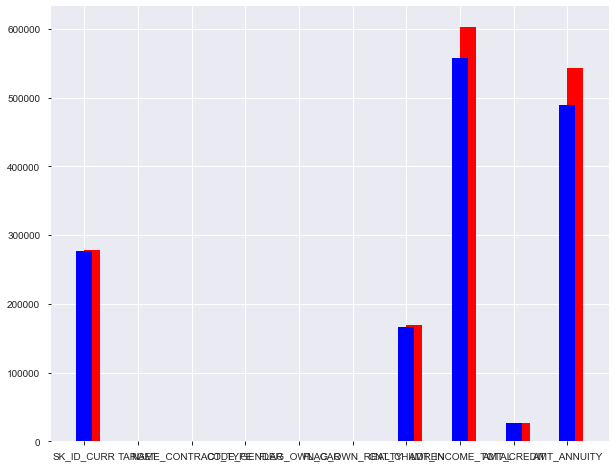

In [105]:
plt.figure(figsize = (10, 8))
width = 0.3

plt.bar(labels[:10], df0_mean[:10], color='r', width=width, align='edge')
plt.bar(labels[:10], df1_mean[:10], color='b', width=width, align='center')
#plt.xticks(labels[:20]+width/2, labels[:20])
plt.show()
#plt.bar(df1_mean)

In [123]:
df_mean_subtraction = np.abs(df1_mean - df0_mean)

In [128]:
pd.set_option('display.max_rows', 200)

In [129]:
df_mean_subtraction

SK_ID_CURR                                    795.576601
TARGET                                          1.000000
NAME_CONTRACT_TYPE                              0.033288
FLAG_OWN_CAR                                    0.038000
FLAG_OWN_REALTY                                 0.010404
CNT_CHILDREN                                    0.050861
AMT_INCOME_TOTAL                             3465.961359
AMT_CREDIT                                  44869.754328
AMT_ANNUITY                                   681.879059
AMT_GOODS_PRICE                             53764.382449
REGION_POPULATION_RELATIVE                      0.001890
DAYS_BIRTH                                   1253.348321
DAYS_EMPLOYED                               23301.470675
DAYS_REGISTRATION                             542.814056
DAYS_ID_PUBLISH                               285.120171
OWN_CAR_AGE                                     1.733151
FLAG_MOBIL                                      0.000004
FLAG_EMP_PHONE                 

In [130]:
ddf = df_mean_subtraction/ np.abs(df1_mean)
ddf

SK_ID_CURR                                  0.002867
TARGET                                      1.000000
NAME_CONTRACT_TYPE                          0.515194
FLAG_OWN_CAR                                0.124517
FLAG_OWN_REALTY                             0.015208
CNT_CHILDREN                                0.109660
AMT_INCOME_TOTAL                            0.020928
AMT_CREDIT                                  0.080444
AMT_ANNUITY                                 0.025749
AMT_GOODS_PRICE                             0.109954
REGION_POPULATION_RELATIVE                  0.098800
DAYS_BIRTH                                  0.084203
DAYS_EMPLOYED                               0.549632
DAYS_REGISTRATION                           0.120971
DAYS_ID_PUBLISH                             0.104359
OWN_CAR_AGE                                 0.126797
FLAG_MOBIL                                  0.000004
FLAG_EMP_PHONE                              0.073749
FLAG_WORK_PHONE                             0.

## 平均値の比較 

（mean target=1 - mean target=0) / mean target=0  
を各変数で表示  
→　高い方が、２つのグループで大きな差がある変数  
　　
  ORGANIZATION_TYPE_Trade: type 6                      0.822986  
NAME_INCOME_TYPE_Unemployed                          0.846318  
NAME_INCOME_TYPE_Maternity leave                     0.868273  
ORGANIZATION_TYPE_Transport: type 1                  0.873457  
TARGET                                               1.000000  
ORGANIZATION_TYPE_Industry: type 12                  1.226821  
FLAG_DOCUMENT_14                                     1.555512  
ORGANIZATION_TYPE_Trade: type 4                      1.722367  
FLAG_DOCUMENT_15                                     1.882036  
FLAG_DOCUMENT_13                                     2.085349  
FLAG_DOCUMENT_17                                     2.512731  
NAME_EDUCATION_TYPE_Academic degree                  3.712915  
 
 例えば、unemployedは２グループ間で差が大きい

In [131]:
ddf.sort_values()

FLAG_MOBIL                                           0.000004
FLAG_CONT_MOBILE                                     0.000059
YEARS_BEGINEXPLUATATION_AVG                          0.002315
YEARS_BEGINEXPLUATATION_MODE                         0.002347
YEARS_BEGINEXPLUATATION_MEDI                         0.002406
SK_ID_CURR                                           0.002867
WEEKDAY_APPR_PROCESS_START_THURSDAY                  0.003676
ORGANIZATION_TYPE_Industry: type 7                   0.005310
ORGANIZATION_TYPE_Business Entity Type 1             0.008753
FLAG_DOCUMENT_5                                      0.009438
WEEKDAY_APPR_PROCESS_START_FRIDAY                    0.009887
ORGANIZATION_TYPE_Advertising                        0.011417
WEEKDAY_APPR_PROCESS_START_WEDNESDAY                 0.011661
YEARS_BUILD_MODE                                     0.012800
YEARS_BUILD_MEDI                                     0.013253
YEARS_BUILD_AVG                                      0.013350
CNT_FAM_

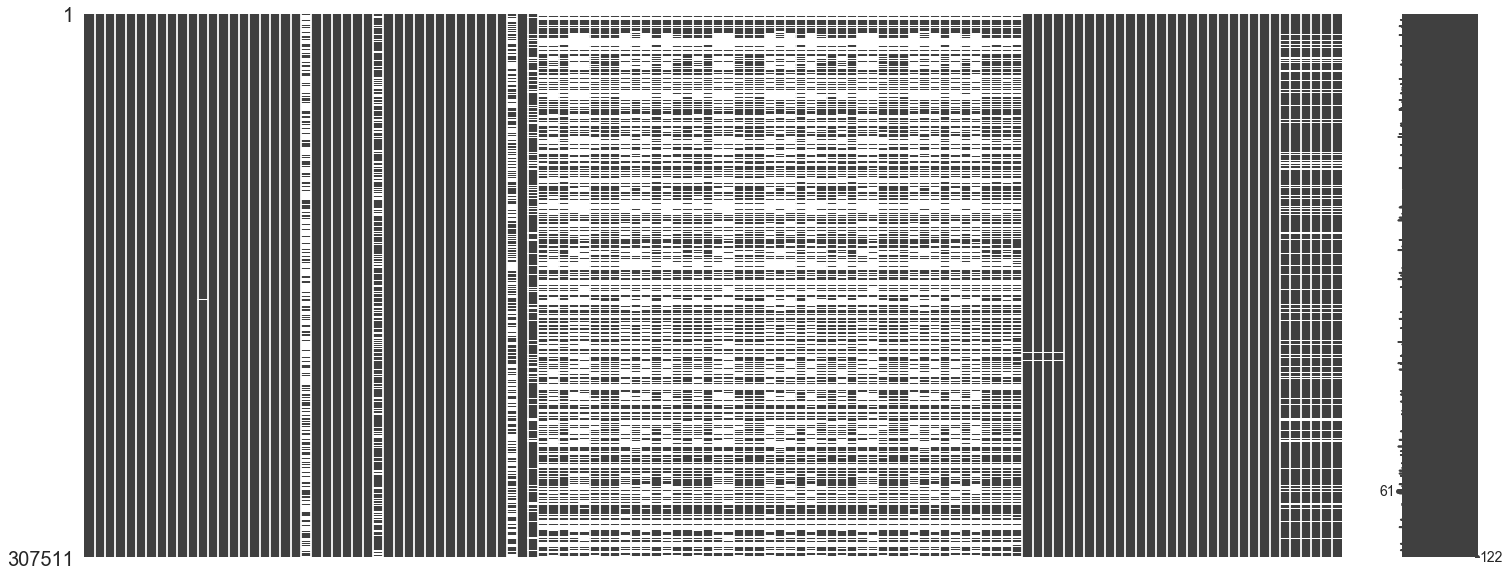

In [150]:
#欠損値の表示
from quilt.data.ResidentMario import missingno_data
collisions = missingno_data.nyc_collision_factors()
collisions = collisions.replace("nan", np.nan)
import missingno as msno
%matplotlib inline

msno.matrix(df)
#msno.bar(df)
#msno.dendrogram(df)  #欠損値のtree（似た欠損値が繋がる）

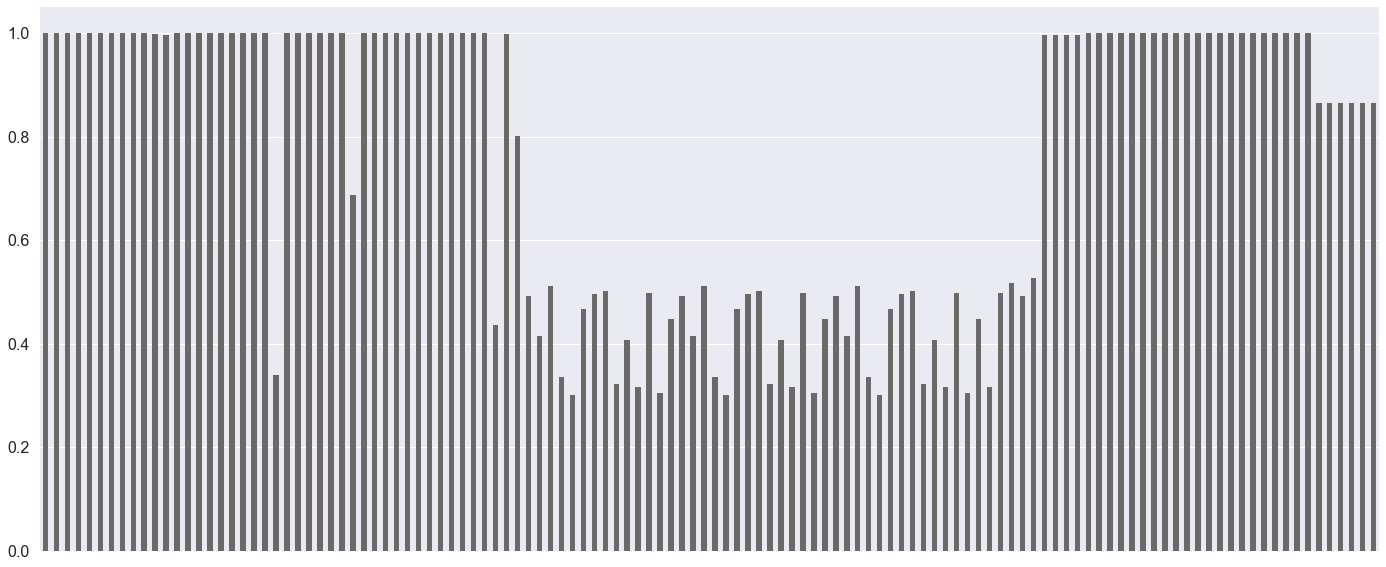

In [151]:
msno.bar(df)

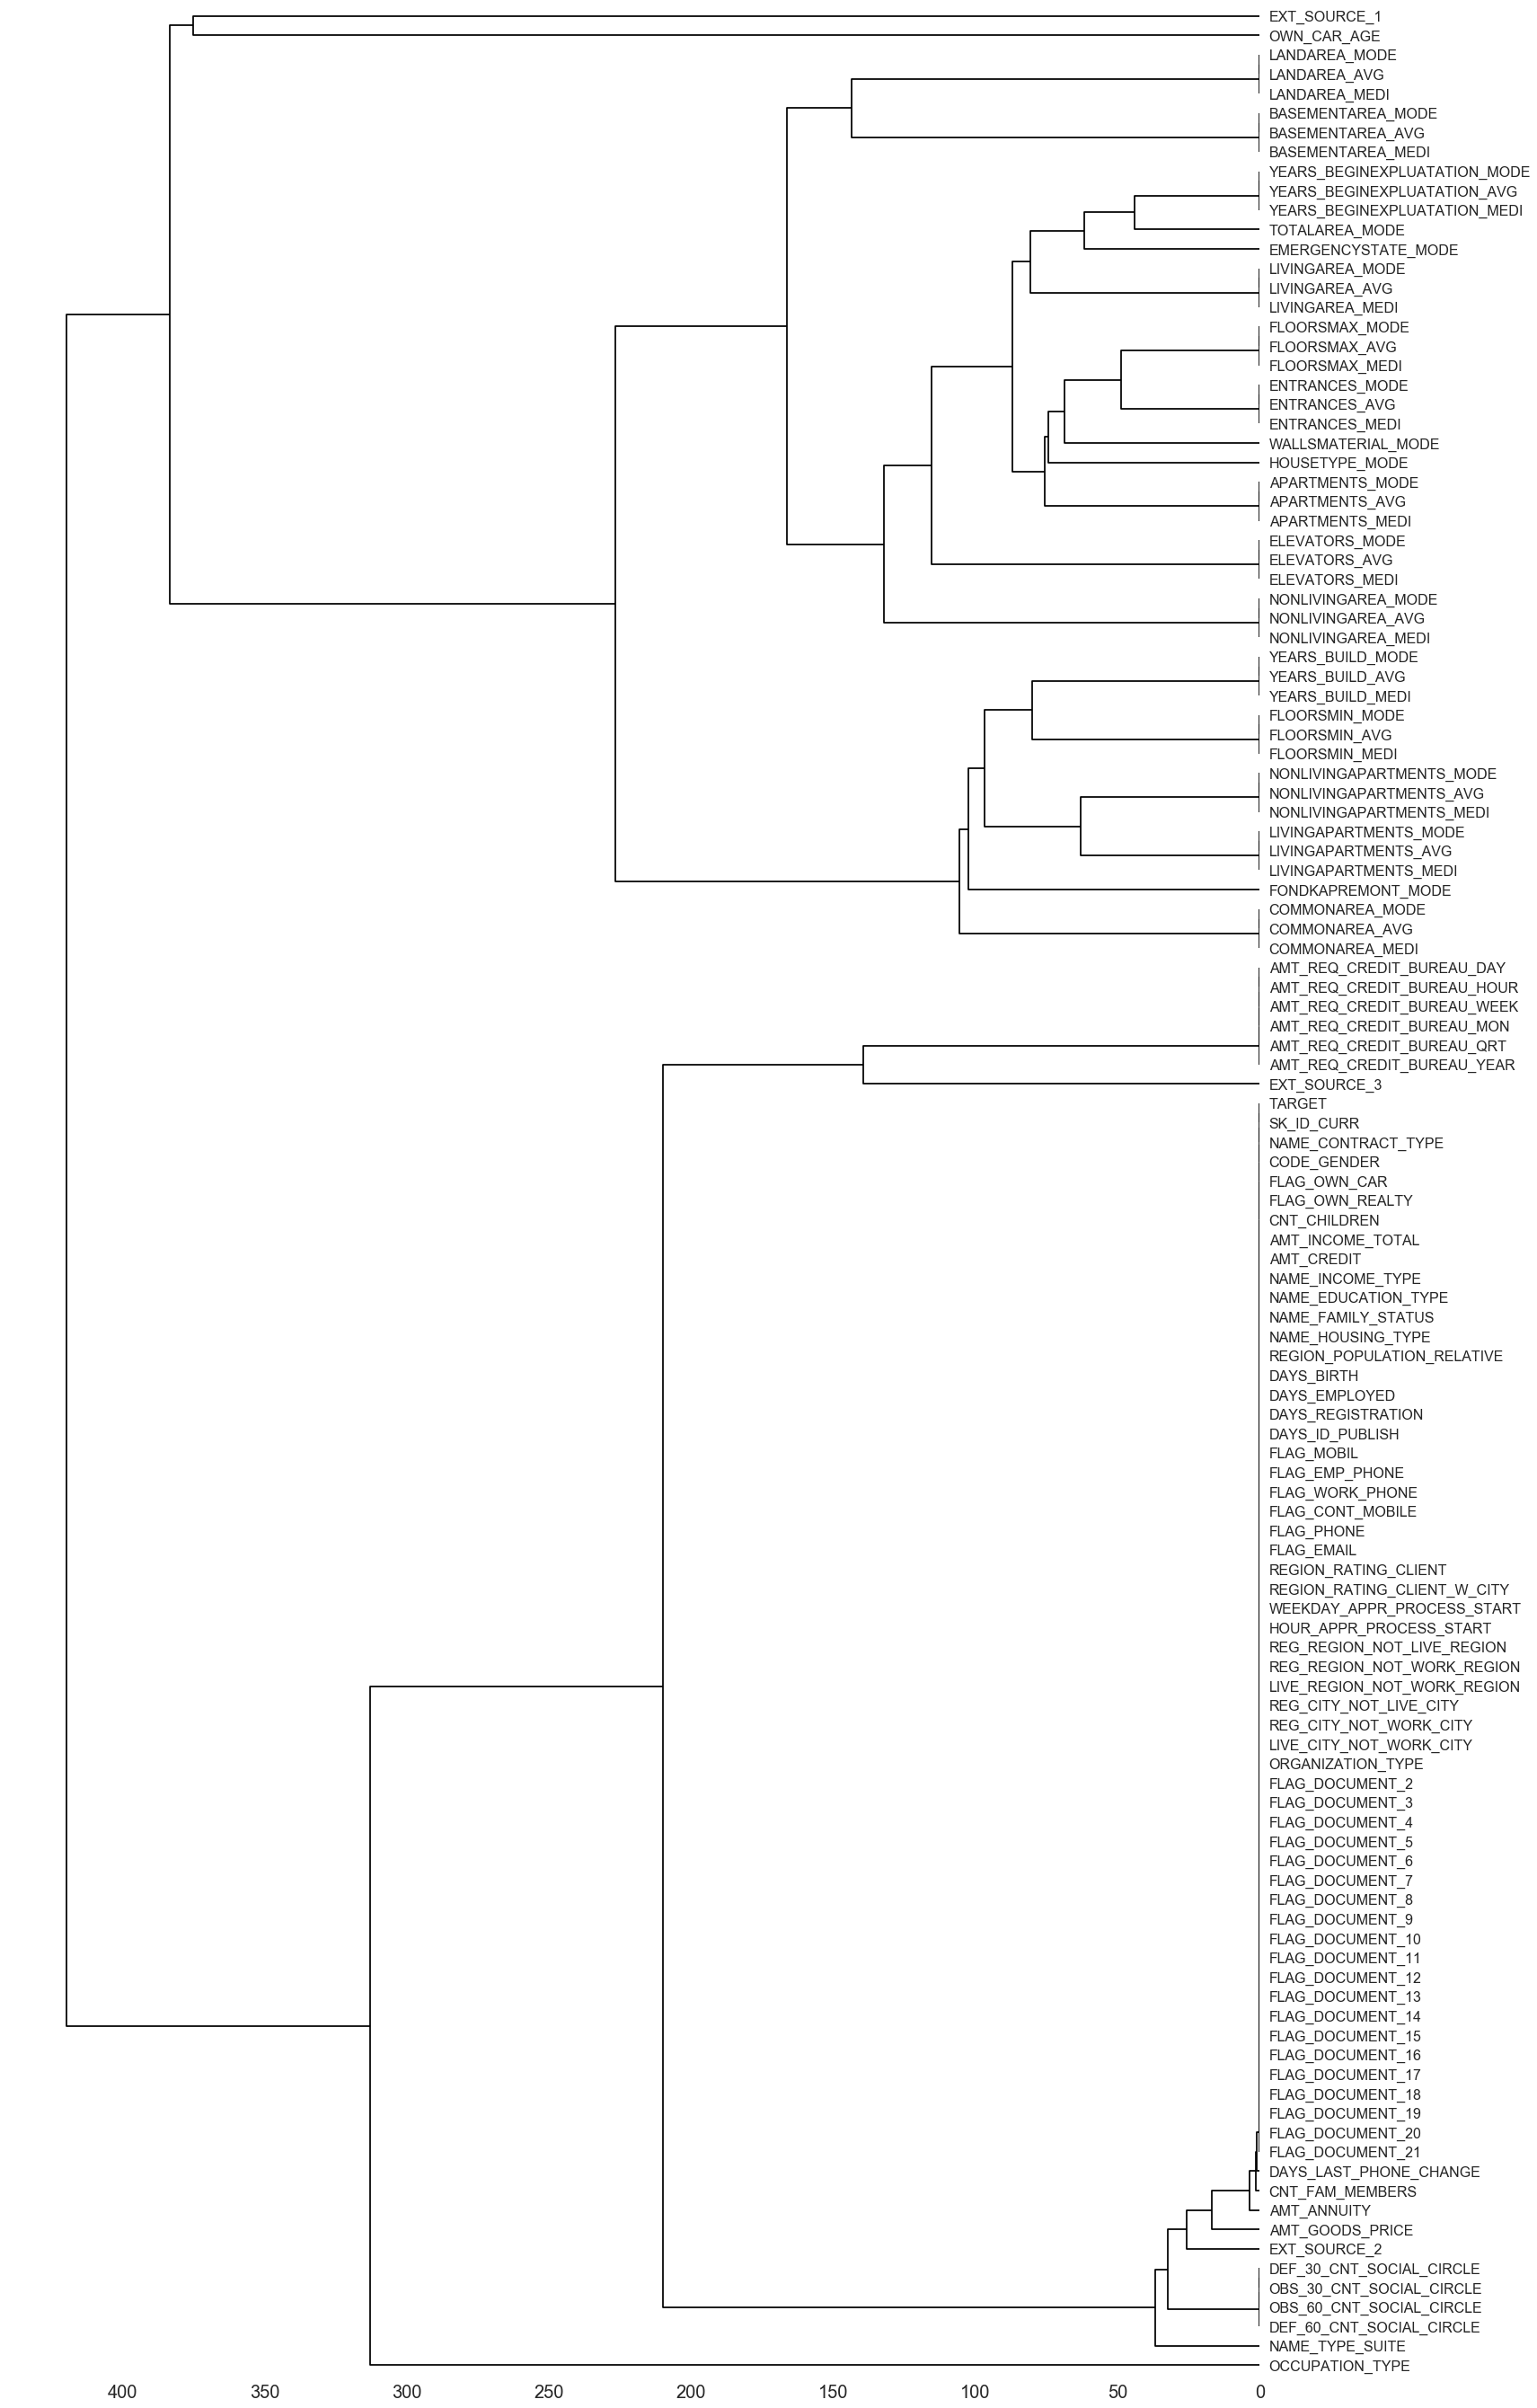

In [152]:
msno.dendrogram(df) 

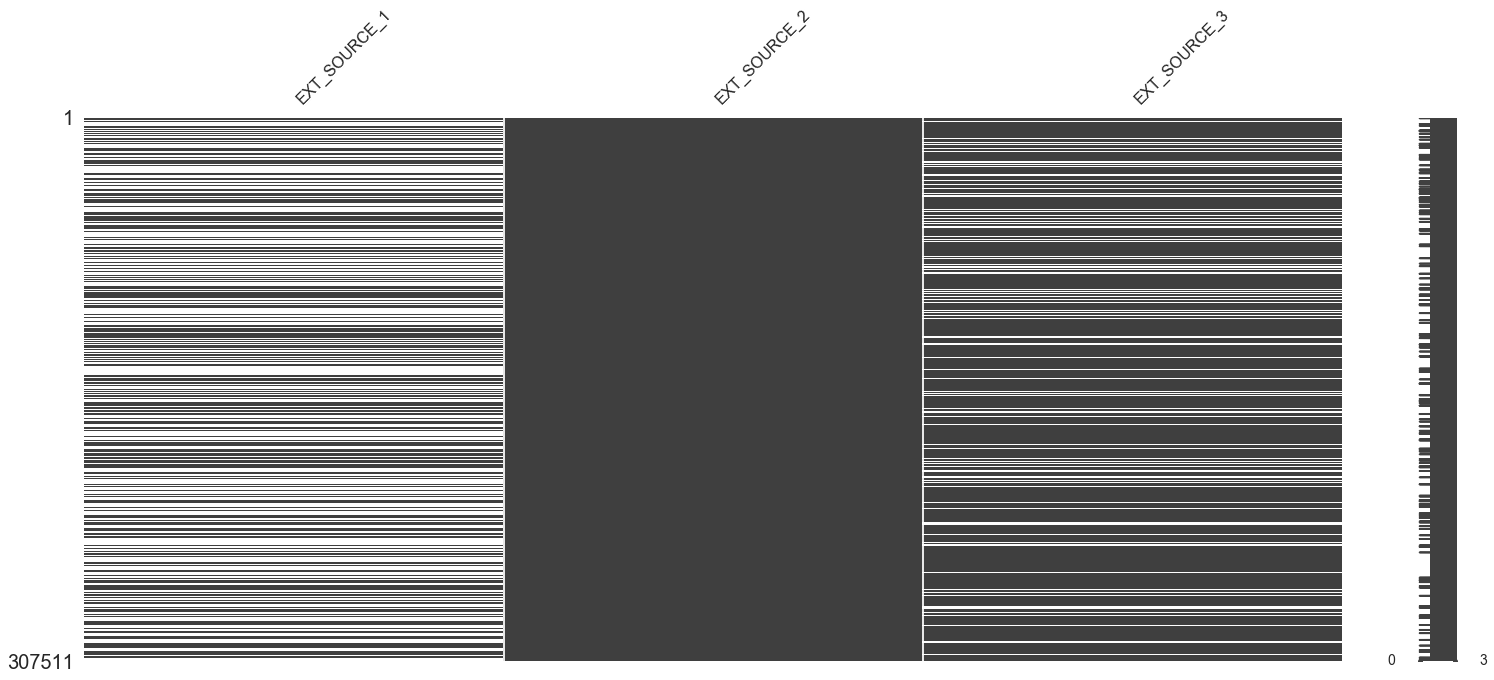

In [154]:
msno.matrix(df.loc[:, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']])

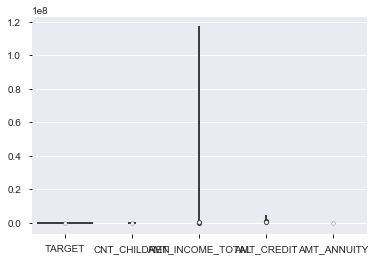

In [160]:
sns.violinplot(data=df.iloc[:, 1:10])

In [158]:
df.iloc[:, 5:10].head()

FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY
0               Y             0          202500.0    406597.5      24700.5
1               N             0          270000.0   1293502.5      35698.5
2               Y             0           67500.0    135000.0       6750.0
3               Y             0          135000.0    312682.5      29686.5
4               Y             0          121500.0    513000.0      21865.5

TypeError: boxplot() got an unexpected keyword argument 'label'

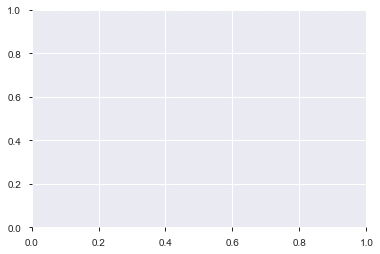

In [165]:
e = app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'].dropna()
f = app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'].dropna()

sns.boxplot(e, label='0')
sns.boxplot(f, label='1')

In [176]:
e = df.loc[:, ['DAYS_BIRTH', 'TARGET']].dropna()

In [179]:
sns.boxplot(x='x', y='y', data=e, hue='TARGET')

ValueError: Could not interpret input 'x'

In [187]:
df3=df.loc[:, ['TARGET', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2',  'EXT_SOURCE_3']]

In [188]:
df3.head()

TARGET  DAYS_BIRTH  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
0       1       -9461      0.083037      0.262949      0.139376
1       0      -16765      0.311267      0.622246           NaN
2       0      -19046           NaN      0.555912      0.729567
3       0      -19005           NaN      0.650442           NaN
4       0      -19932           NaN      0.322738           NaN

In [199]:
df3.corr()

TARGET  DAYS_BIRTH  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000    0.078239     -0.155317     -0.160472     -0.178919
DAYS_BIRTH    0.078239    1.000000     -0.600610     -0.091996     -0.205478
EXT_SOURCE_1 -0.155317   -0.600610      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472   -0.091996      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919   -0.205478      0.186846      0.109167      1.000000

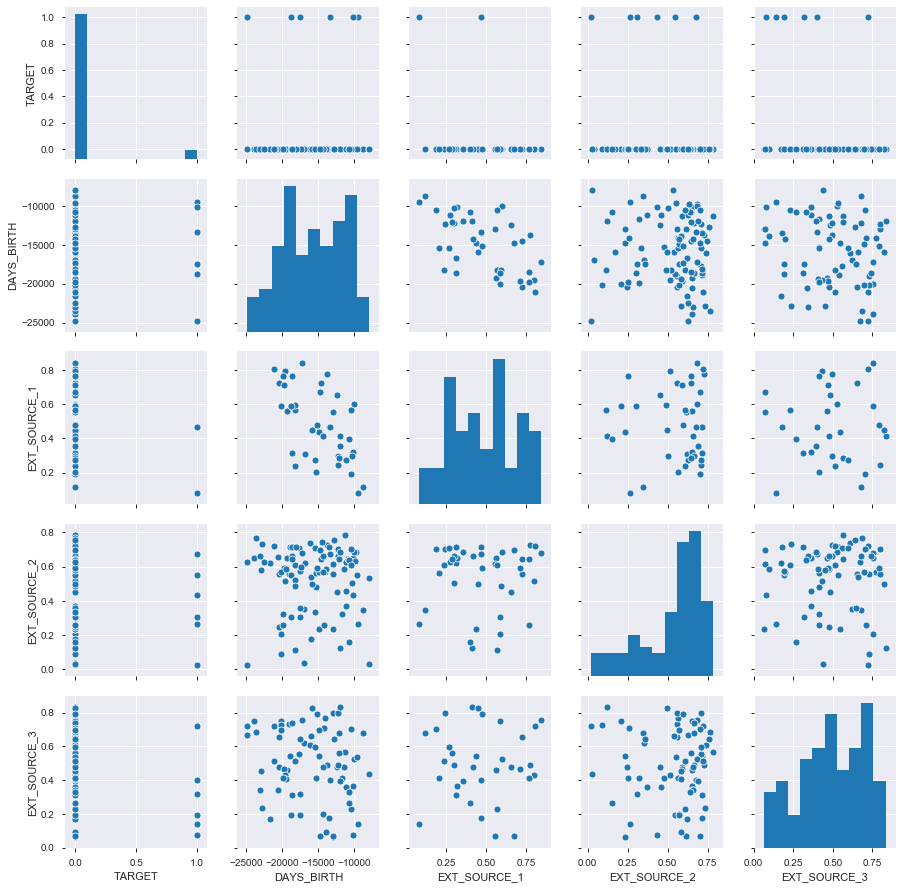

In [217]:
sns.pairplot(df3[:100]) #特徴量4つに絞って散布図表示

In [202]:
df3[:100].dropna()

TARGET  DAYS_BIRTH  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
0        1       -9461      0.083037      0.262949      0.139376
6        0      -13778      0.774761      0.724000      0.492060
8        0      -20099      0.587334      0.205747      0.751724
10       0      -10197      0.319760      0.651862      0.363945
11       0      -20417      0.722044      0.555183      0.652897
12       0      -13439      0.464831      0.715042      0.176653
15       0       -8728      0.115634      0.346634      0.678568
21       0      -14815      0.437709      0.233767      0.542445
25       0      -19334      0.561948      0.651406      0.461482
28       0       -9994      0.600396      0.685011      0.524496
36       0      -17199      0.842763      0.681699      0.754406
37       0      -21077      0.804586      0.719799      0.722393
42       1      -13384      0.468208      0.674203      0.399676
48       0      -19727      0.710427      0.589187      0.466864
50       0      -12406      0.656225      0.450850      0.479449
51       0      -18632      0.311510      0.713355      0.309275
52       0      -12282      0.244562      0.705947      0.799297
53       0      -10473      0.189596      0.702979      0.701696
55       0      -12955      0.552772      0.616637      0.070109
57       0      -18248      0.237720      0.609135      0.513694
63       0      -12240      0.299606      0.664544      0.492060
65       0      -12049      0.286783      0.647348      0.562060
66       0      -19550      0.796161      0.517270      0.429424
67       0      -15359      0.202477      0.561923      0.413597
68       0      -11956      0.411506      0.123888      0.832785
70       0      -12009      0.357707      0.686505      0.394495
71       0      -15406      0.270766      0.707126      0.597192
85       0      -15909      0.447675      0.495765      0.824595
87       0      -14321      0.414794      0.661108      0.477649
90       0      -19810      0.765154      0.254760      0.411849
93       0      -10485      0.563323      0.608604      0.228883
95       0      -15137      0.475762      0.593019      0.789880
96       0      -10734      0.395724      0.154937      0.265049
98       0      -14751      0.671272      0.700274      0.071055

LinAlgError: singular matrix

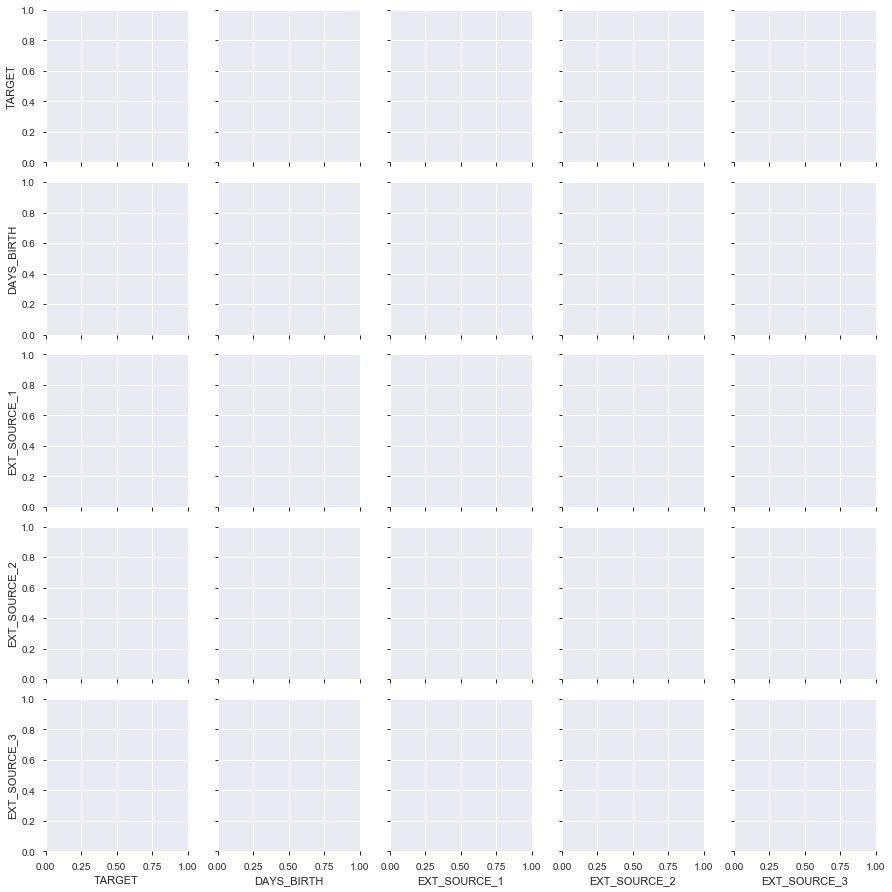

In [203]:
sns.pairplot(df3[:1000].dropna(), hue='TARGET')

In [ ]:
#import seaborn as sns
#
#sns.pairplot(df[:100], hue='TARGET')

#sns.pairplot(df3[:100], hue='TARGET')

In [ ]:
sns.pairplot(df3[:100], hue='TARGET')

In [207]:
#import lightgbm as lgb

In [208]:
#lgb.plot_importance(model, figsize=(12, 25), max_num_features=100);

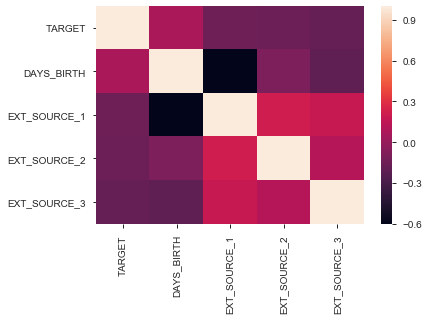

In [209]:
sns.heatmap(df3.corr())

In [210]:
df3.corr()

TARGET  DAYS_BIRTH  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000    0.078239     -0.155317     -0.160472     -0.178919
DAYS_BIRTH    0.078239    1.000000     -0.600610     -0.091996     -0.205478
EXT_SOURCE_1 -0.155317   -0.600610      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472   -0.091996      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919   -0.205478      0.186846      0.109167      1.000000

In [211]:
df4 = df3[:1000].dropna()

In [212]:
df4.head()

TARGET  DAYS_BIRTH  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
0        1       -9461      0.083037      0.262949      0.139376
6        0      -13778      0.774761      0.724000      0.492060
8        0      -20099      0.587334      0.205747      0.751724
10       0      -10197      0.319760      0.651862      0.363945
11       0      -20417      0.722044      0.555183      0.652897

In [213]:
type(df4)

pandas.core.frame.DataFrame

LinAlgError: singular matrix

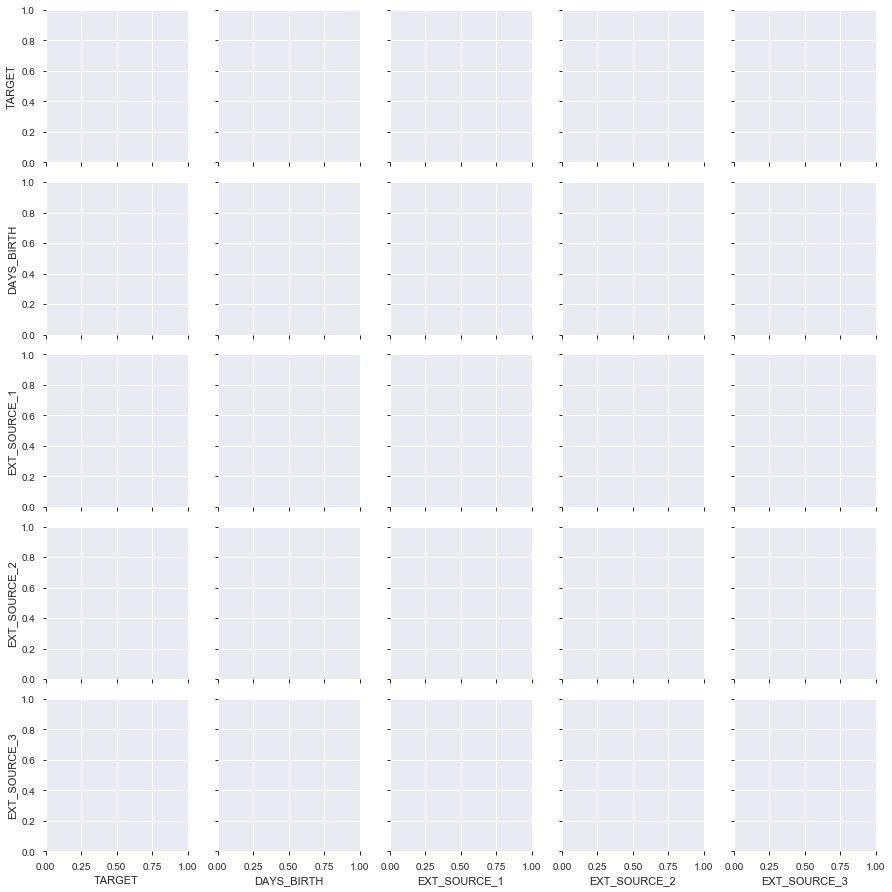

In [215]:
sns.pairplot(df4, hue = 'TARGET')

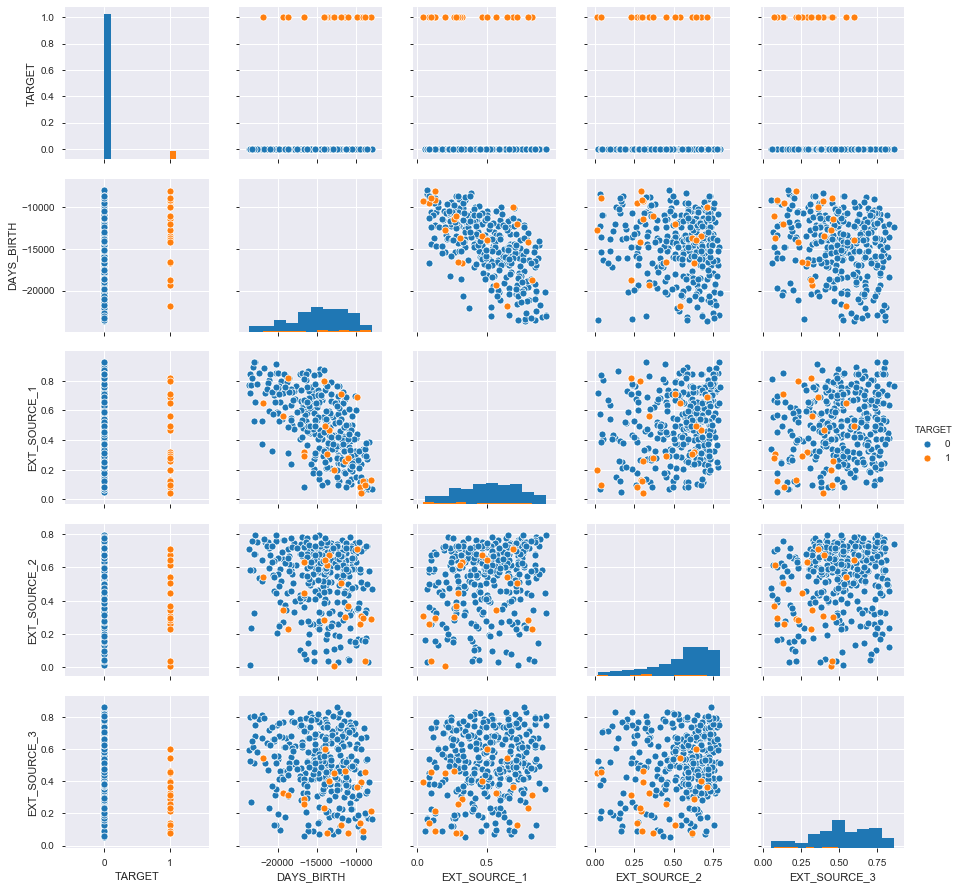

In [229]:
sns.pairplot(df4, hue = 'TARGET', diag_kind='hist')#何故かdiag_kind='hist'を入れないとエラーがでる

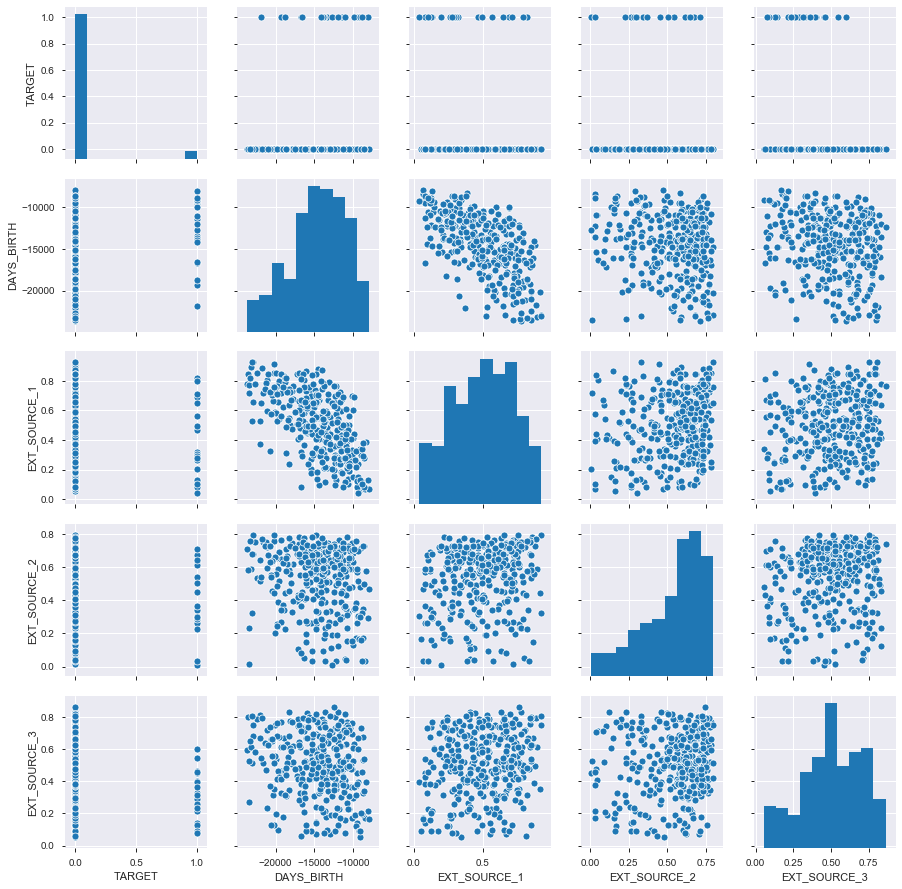

In [216]:
sns.pairplot(df4)

In [225]:
from numpy import linalg as LA
LA.matrix_rank(df4['EXT_SOURCE_3'])

1

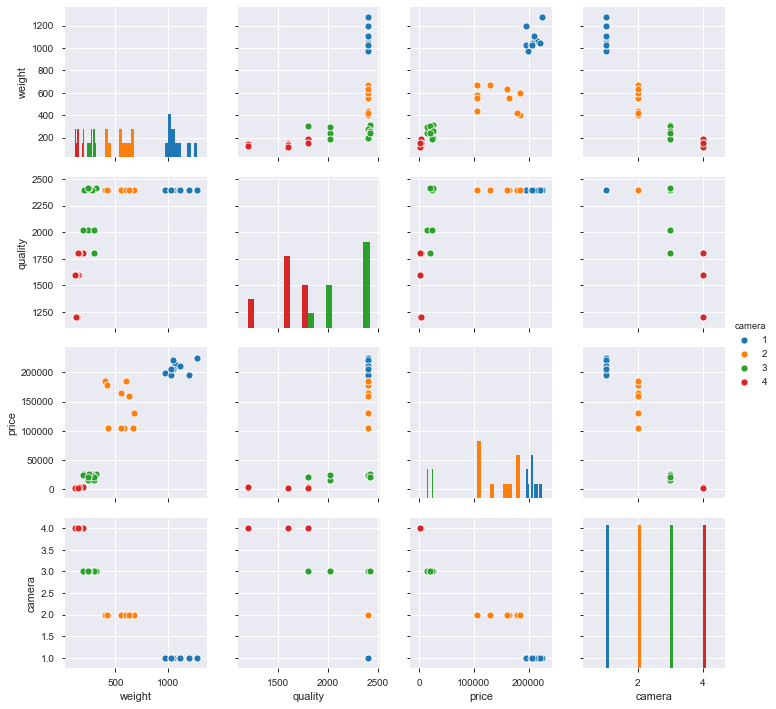

In [228]:
c_data = [[1066, 2400, 215000, 1], [1274, 2400, 225000, 1], [1048, 2400, 205800, 1], [1200, 2400, 195500, 1],
 [970, 2400, 199000, 1], [1042, 2400, 220890, 1], [1110, 2400, 210400, 1], [1023, 2400, 195400, 1],
 [1024, 2400, 205000, 1], [1024, 2400, 205300, 1], [433, 2400, 105000, 2], [400, 2400, 185000, 2],
 [420, 2400, 179000, 2], [580, 2400, 105000, 2], [550, 2400, 165020, 2], [549, 2400, 105000, 2],
 [600, 2400, 185000, 2], [666, 2400, 104980, 2], [672, 2400, 130300, 2], [631, 2400, 160300, 2],
 [200, 2400, 26100, 3], [238, 2020, 15000, 3], [277, 2400, 25400, 3], [298, 2020, 15410, 3],
 [316, 2420, 25000, 3], [276, 2400, 24020, 3], [299, 1800, 20000, 3], [254, 2420, 25030, 3],
 [189, 2020, 24000, 3], [241, 2420, 20260, 3], [150, 1600, 3000, 4], [143, 1600, 2500, 4],
 [188, 1800, 3000, 4], [115, 1600, 2500, 4], [140, 1200, 2500, 4], [127, 1200, 3000, 4],
 [130, 1600, 2500, 4], [153, 1800, 3000, 4], [116, 1600, 2500, 4], [149, 1800, 2500, 4]]

head_data = list(['weight', 'quality', 'price', 'camera'])
df  = pd.DataFrame(c_data, columns=head_data)
sns.pairplot(df, hue='camera', diag_kind='hist')